In [ ]:
!pip install qutip
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

class TimeDependentEigenSystem:
    def __init__(self, H, t_list):
        """
        時間依存ハミルトニアンの固有値・固有ベクトルなどを効率的に計算するオブジェクト。

        Parameters:
            H (function): ハミルトニアンを返す関数 H(t)
            t_list (array-like): 計算する時間点のリスト
        """
        self.H = H
        self.t_list = t_list
        self.eigenvalues = []
        self.eigenvectors = []
        self._calculate_eigen_system()

    def _calculate_eigen_system(self):
        """すべての時間点で固有値・固有ベクトルを計算し、キャッシュする。"""
        for t in self.t_list:
            H_t = self.H[0] + self.H[1][0] * self.H[1][1](t, args) # 時刻 t のハミルトニアン
            eigvals, eigvecs = H_t.eigenstates()  # 固有値と固有ベクトル
            self.eigenvalues.append(eigvals)
            self.eigenvectors.append(eigvecs)

        # 固有値と固有ベクトルを NumPy 配列に変換
        self.eigenvalues = np.array(self.eigenvalues)
        self.eigenvectors = np.array(self.eigenvectors, dtype=object)  # 固有ベクトルはオブジェクト型

    def get_eigenvalue(self, t_index, n):
        """指定した時刻と固有モードの固有値を取得する。"""
        return self.eigenvalues[t_index][n]

    def get_eigenvector(self, t_index, n):
        """指定した時刻と固有モードの固有ベクトルを取得する。"""
        return self.eigenvectors[t_index][n]

    def get_eigenvalue_derivatives(self, n):
        """
        固有値の時間微分を計算する。

        Parameters:
            n (int): 固有値インデックス。

        Returns:
            np.ndarray: 固有値の時間微分
        """
        # 各時刻の固有値を抽出
        eigenvalues_n = self.eigenvalues[:, n]
        # 時間微分を np.gradient で計算
        return np.gradient(eigenvalues_n, self.t_list)

    def get_eigenvector_derivatives(self, n):
        """
        固有ベクトルの時間微分を計算する。

        Parameters:
            n (int): 固有ベクトルインデックス。

        Returns:
            list: 各時刻の固有ベクトルの時間微分
        """
        eigvec_derivatives = []
        for i in range(len(self.t_list)):
            if i == 0:
                # 最初の点：前方差分
                delta_vec = (self.eigenvectors[i + 1][n] - self.eigenvectors[i][n]) / (self.t_list[i + 1] - self.t_list[i])
            elif i == len(self.t_list) - 1:
                # 最後の点：後方差分
                delta_vec = (self.eigenvectors[i][n] - self.eigenvectors[i - 1][n]) / (self.t_list[i] - self.t_list[i - 1])
            else:
                # 中間点：中心差分
                delta_vec = (self.eigenvectors[i + 1][n] - self.eigenvectors[i - 1][n]) / (self.t_list[i + 1] - self.t_list[i - 1])
            eigvec_derivatives.append(delta_vec)
        return eigvec_derivatives

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 15.3 MB/s eta 0:00:00


Omega=0.5



/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


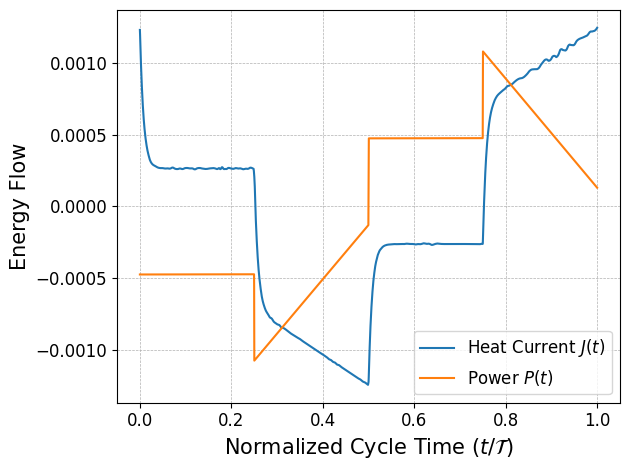

Delta_T=0.01 Omega=0.5_DONE

 E_ERROR_SUM=3.7117444534606747e-10

Delta_T=0.01 Omega=1.5263157894736843_DONE

 E_ERROR_SUM=1.1578212694152157e-09

Delta_T=0.01 Omega=2.5526315789473686_DONE

 E_ERROR_SUM=1.8945669477687943e-09

Delta_T=0.01 Omega=3.578947368421053_DONE

 E_ERROR_SUM=2.507294705189622e-09

Delta_T=0.01 Omega=4.605263157894737_DONE

 E_ERROR_SUM=2.954050800849095e-09

Delta_T=0.01 Omega=5.631578947368421_DONE

 E_ERROR_SUM=3.3590937392746767e-09

Delta_T=0.01 Omega=6.657894736842106_DONE

 E_ERROR_SUM=3.668344350504782e-09

Delta_T=0.01 Omega=7.68421052631579_DONE

 E_ERROR_SUM=4.046741663987774e-09

Delta_T=0.01 Omega=8.710526315789474_DONE

 E_ERROR_SUM=4.348183813007722e-09

Delta_T=0.01 Omega=9.73684210526316_DONE

 E_ERROR_SUM=4.668272879371216e-09

Delta_T=0.01 Omega=10.763157894736842_DONE

 E_ERROR_SUM=4.982532164632403e-09

Delta_T=0.01 Omega=11.789473684210527_DONE

 E_ERROR_SUM=5.293665061856245e-09

Delta_T=0.01 Omega=12.815789473684212_DONE

 E_ERROR_SUM=5.5

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


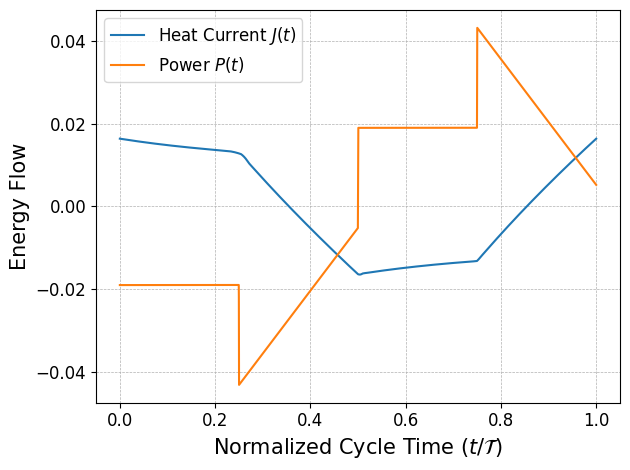

Delta_T=0.01 Omega=20.0_DONE

 E_ERROR_SUM=7.0157533116343984e-09



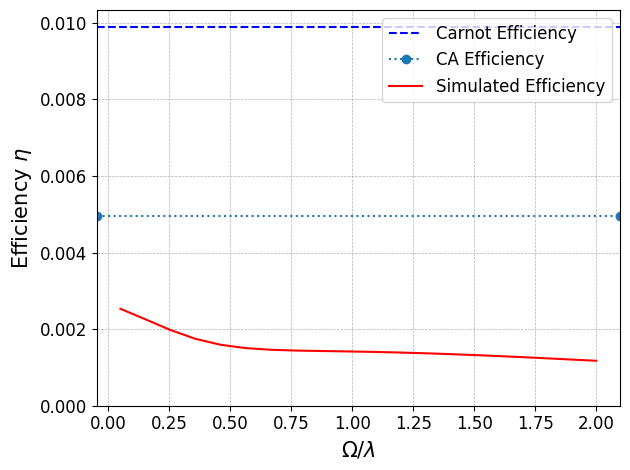

Omega=0.5



/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


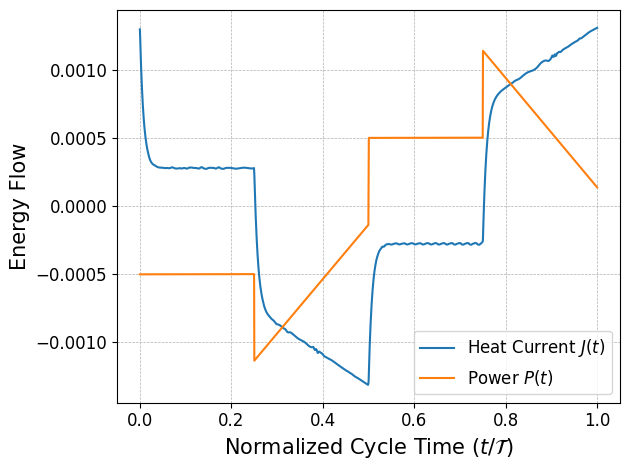

Delta_T=0.010549694614103277 Omega=0.5_DONE

 E_ERROR_SUM=4.1482772078493824e-10

Delta_T=0.010549694614103277 Omega=1.5263157894736843_DONE

 E_ERROR_SUM=1.2782210012662887e-09

Delta_T=0.010549694614103277 Omega=2.5526315789473686_DONE

 E_ERROR_SUM=2.094190071355584e-09

Delta_T=0.010549694614103277 Omega=3.578947368421053_DONE

 E_ERROR_SUM=2.7962564902450637e-09

Delta_T=0.010549694614103277 Omega=4.605263157894737_DONE

 E_ERROR_SUM=3.3096491190015564e-09

Delta_T=0.010549694614103277 Omega=5.631578947368421_DONE

 E_ERROR_SUM=3.739643539280024e-09

Delta_T=0.010549694614103277 Omega=6.657894736842106_DONE

 E_ERROR_SUM=4.091622818336305e-09

Delta_T=0.010549694614103277 Omega=7.68421052631579_DONE

 E_ERROR_SUM=4.45154313410967e-09

Delta_T=0.010549694614103277 Omega=8.710526315789474_DONE

 E_ERROR_SUM=4.826260391332937e-09

Delta_T=0.010549694614103277 Omega=9.73684210526316_DONE

 E_ERROR_SUM=5.208191655725614e-09

Delta_T=0.010549694614103277 Omega=10.763157894736842_DONE

 

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


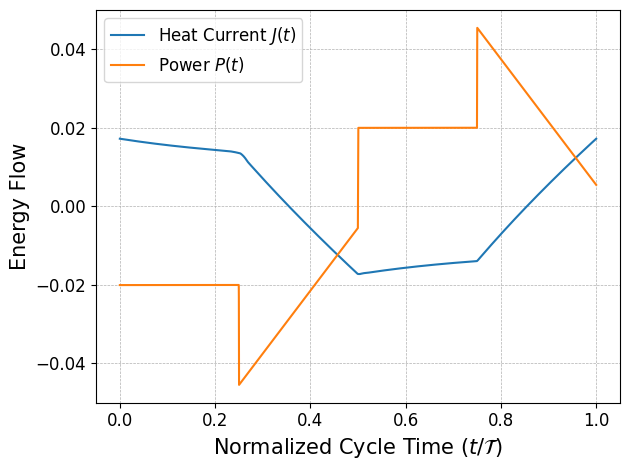

Delta_T=0.010549694614103277 Omega=20.0_DONE

 E_ERROR_SUM=7.828410364396632e-09



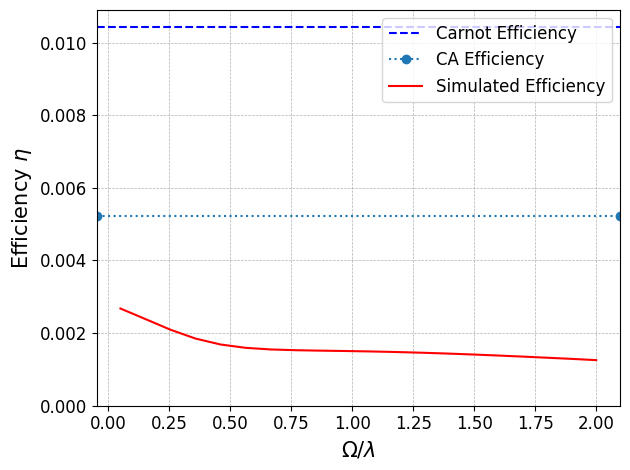

Omega=0.5



/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


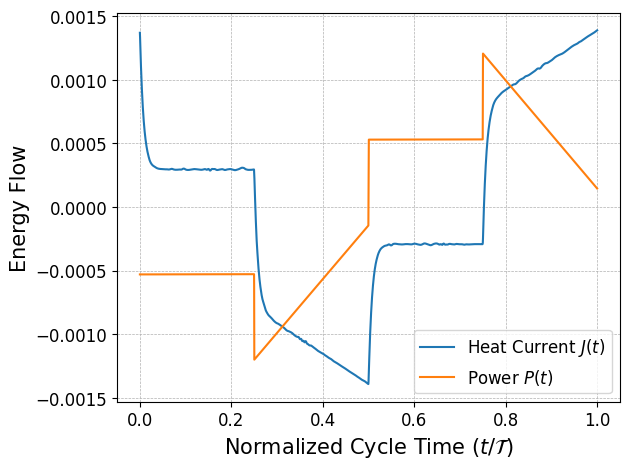

Delta_T=0.011163337250293772 Omega=0.5_DONE

 E_ERROR_SUM=4.6506701961712693e-10

Delta_T=0.011163337250293772 Omega=1.5263157894736843_DONE

 E_ERROR_SUM=1.434142860023968e-09

Delta_T=0.011163337250293772 Omega=2.5526315789473686_DONE

 E_ERROR_SUM=2.3613102445585454e-09

Delta_T=0.011163337250293772 Omega=3.578947368421053_DONE

 E_ERROR_SUM=3.107601787011305e-09

Delta_T=0.011163337250293772 Omega=4.605263157894737_DONE

 E_ERROR_SUM=3.7006919872267785e-09

Delta_T=0.011163337250293772 Omega=5.631578947368421_DONE

 E_ERROR_SUM=4.152310467686604e-09

Delta_T=0.011163337250293772 Omega=6.657894736842106_DONE

 E_ERROR_SUM=4.618578464121725e-09

Delta_T=0.011163337250293772 Omega=7.68421052631579_DONE

 E_ERROR_SUM=5.038439998550359e-09

Delta_T=0.011163337250293772 Omega=8.710526315789474_DONE

 E_ERROR_SUM=5.393940294418087e-09

Delta_T=0.011163337250293772 Omega=9.73684210526316_DONE

 E_ERROR_SUM=5.8306535155594474e-09

Delta_T=0.011163337250293772 Omega=10.763157894736842_DONE



/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


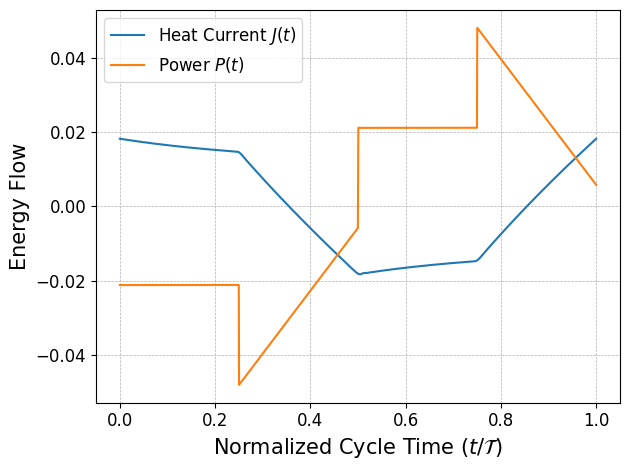

Delta_T=0.011163337250293772 Omega=20.0_DONE

 E_ERROR_SUM=8.764550418760564e-09



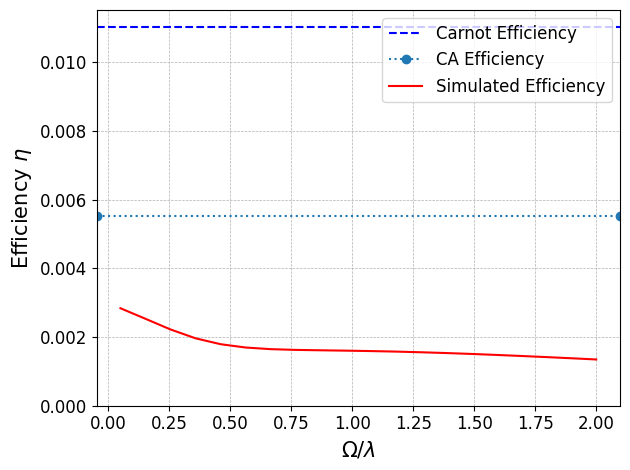

Omega=0.5



/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


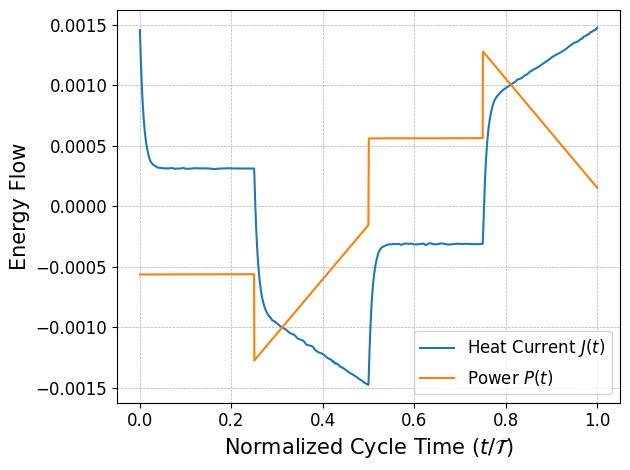

Delta_T=0.011852776044915784 Omega=0.5_DONE

 E_ERROR_SUM=5.25916379889857e-10

Delta_T=0.011852776044915784 Omega=1.5263157894736843_DONE

 E_ERROR_SUM=1.6039684025415113e-09

Delta_T=0.011852776044915784 Omega=2.5526315789473686_DONE

 E_ERROR_SUM=2.6482514930981083e-09

Delta_T=0.011852776044915784 Omega=3.578947368421053_DONE

 E_ERROR_SUM=3.5130100634050976e-09

Delta_T=0.011852776044915784 Omega=4.605263157894737_DONE

 E_ERROR_SUM=4.180663388392292e-09

Delta_T=0.011852776044915784 Omega=5.631578947368421_DONE

 E_ERROR_SUM=4.700166256199623e-09

Delta_T=0.011852776044915784 Omega=6.657894736842106_DONE

 E_ERROR_SUM=5.2155958996102925e-09

Delta_T=0.011852776044915784 Omega=7.68421052631579_DONE

 E_ERROR_SUM=5.609122111227549e-09

Delta_T=0.011852776044915784 Omega=8.710526315789474_DONE

 E_ERROR_SUM=6.123158979853827e-09

Delta_T=0.011852776044915784 Omega=9.73684210526316_DONE

 E_ERROR_SUM=6.589281009716785e-09

Delta_T=0.011852776044915784 Omega=10.763157894736842_DONE

 

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


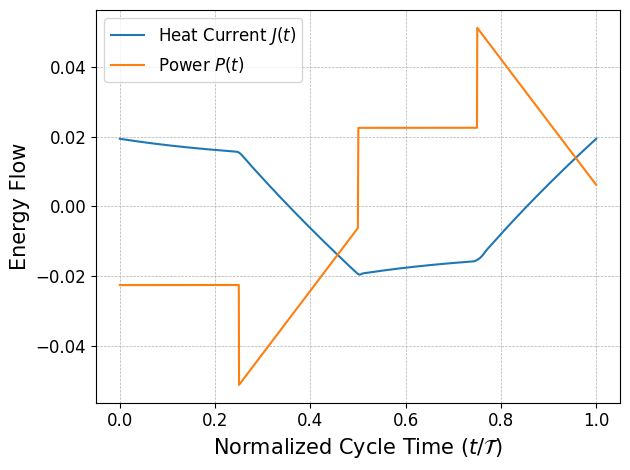

Delta_T=0.011852776044915784 Omega=20.0_DONE

 E_ERROR_SUM=9.82457093456901e-09



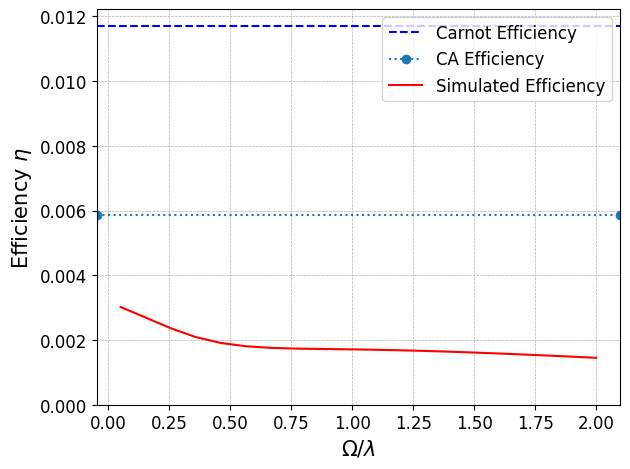

Omega=0.5



/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


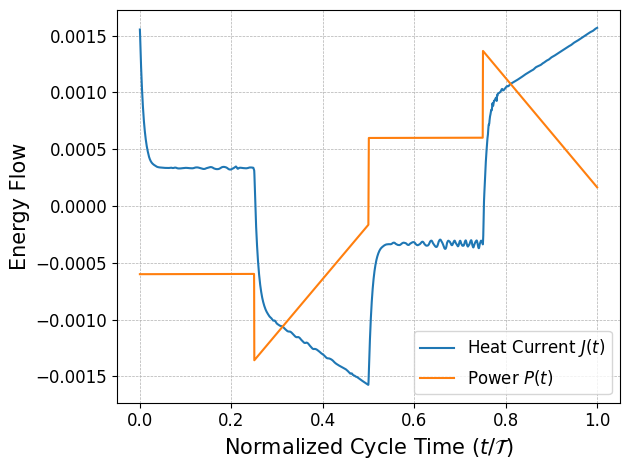

Delta_T=0.012632978723404256 Omega=0.5_DONE

 E_ERROR_SUM=6.044873213095769e-10

Delta_T=0.012632978723404256 Omega=1.5263157894736843_DONE

 E_ERROR_SUM=1.818088110616678e-09

Delta_T=0.012632978723404256 Omega=2.5526315789473686_DONE

 E_ERROR_SUM=3.023082367770158e-09

Delta_T=0.012632978723404256 Omega=3.578947368421053_DONE

 E_ERROR_SUM=3.998521513892683e-09

Delta_T=0.012632978723404256 Omega=4.605263157894737_DONE

 E_ERROR_SUM=4.726563704662845e-09

Delta_T=0.012632978723404256 Omega=5.631578947368421_DONE

 E_ERROR_SUM=5.3415042666760115e-09

Delta_T=0.012632978723404256 Omega=6.657894736842106_DONE

 E_ERROR_SUM=5.923252222039821e-09

Delta_T=0.012632978723404256 Omega=7.68421052631579_DONE

 E_ERROR_SUM=6.425712517632576e-09

Delta_T=0.012632978723404256 Omega=8.710526315789474_DONE

 E_ERROR_SUM=6.918846939818479e-09

Delta_T=0.012632978723404256 Omega=9.73684210526316_DONE

 E_ERROR_SUM=7.45979333860447e-09

Delta_T=0.012632978723404256 Omega=10.763157894736842_DONE

 E_E

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


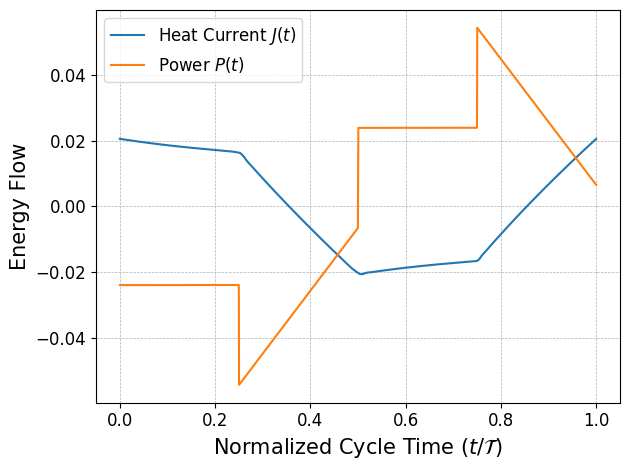

Delta_T=0.012632978723404256 Omega=20.0_DONE

 E_ERROR_SUM=1.1241145791984763e-08



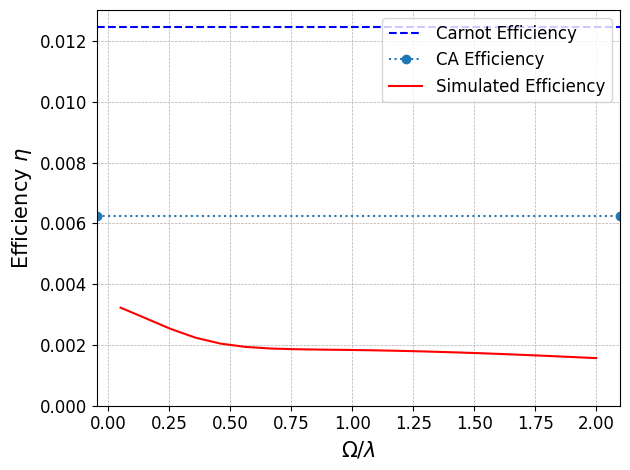

Omega=0.5



/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


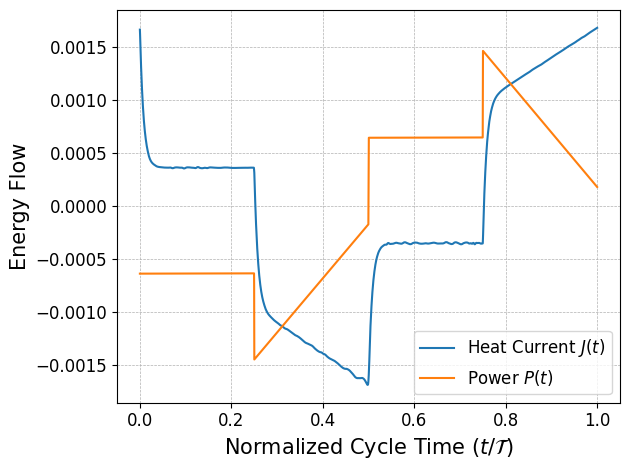

Delta_T=0.013523131672597865 Omega=0.5_DONE

 E_ERROR_SUM=6.861186133133579e-10

Delta_T=0.013523131672597865 Omega=1.5263157894736843_DONE

 E_ERROR_SUM=2.0804738765090036e-09

Delta_T=0.013523131672597865 Omega=2.5526315789473686_DONE

 E_ERROR_SUM=3.4822869310335847e-09

Delta_T=0.013523131672597865 Omega=3.578947368421053_DONE

 E_ERROR_SUM=4.596205763207628e-09

Delta_T=0.013523131672597865 Omega=4.605263157894737_DONE

 E_ERROR_SUM=5.439167690898805e-09

Delta_T=0.013523131672597865 Omega=5.631578947368421_DONE

 E_ERROR_SUM=6.141961078620639e-09

Delta_T=0.013523131672597865 Omega=6.657894736842106_DONE

 E_ERROR_SUM=6.714753697512066e-09

Delta_T=0.013523131672597865 Omega=7.68421052631579_DONE

 E_ERROR_SUM=7.3481464246683e-09

Delta_T=0.013523131672597865 Omega=8.710526315789474_DONE

 E_ERROR_SUM=8.01393740257339e-09

Delta_T=0.013523131672597865 Omega=9.73684210526316_DONE

 E_ERROR_SUM=8.589837063865957e-09

Delta_T=0.013523131672597865 Omega=10.763157894736842_DONE

 E_ER

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


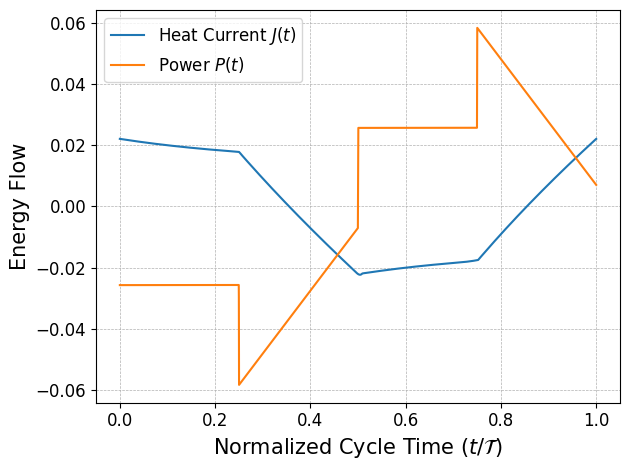

Delta_T=0.013523131672597865 Omega=20.0_DONE

 E_ERROR_SUM=1.2854922015748116e-08



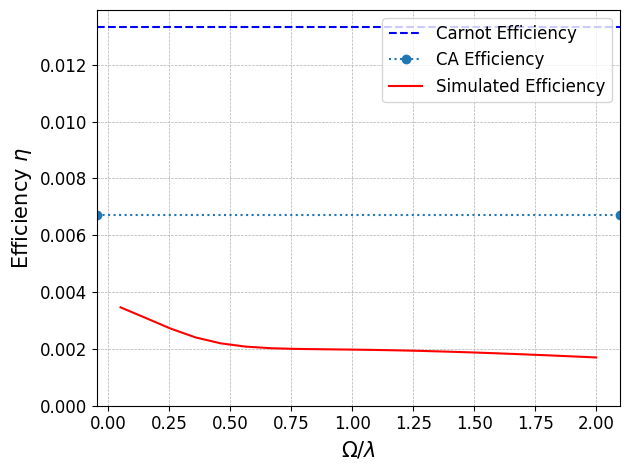

Omega=0.5



/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


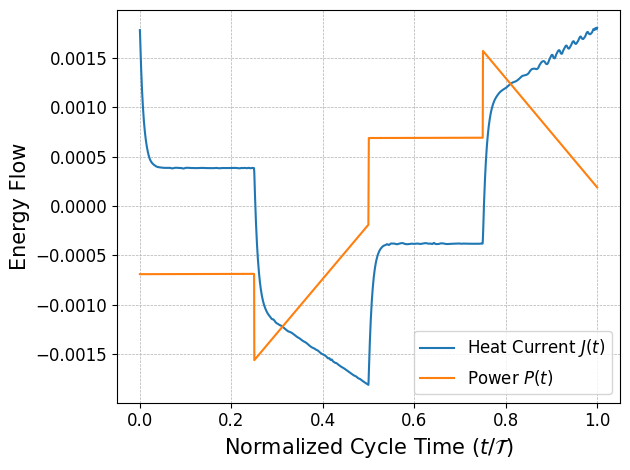

Delta_T=0.014548238897396632 Omega=0.5_DONE

 E_ERROR_SUM=7.848812433319807e-10

Delta_T=0.014548238897396632 Omega=1.5263157894736843_DONE

 E_ERROR_SUM=2.4103892215521228e-09

Delta_T=0.014548238897396632 Omega=2.5526315789473686_DONE

 E_ERROR_SUM=4.039740070238551e-09

Delta_T=0.014548238897396632 Omega=3.578947368421053_DONE

 E_ERROR_SUM=5.273657191495751e-09

Delta_T=0.014548238897396632 Omega=4.605263157894737_DONE

 E_ERROR_SUM=6.312518365664266e-09

Delta_T=0.014548238897396632 Omega=5.631578947368421_DONE

 E_ERROR_SUM=7.078781588676364e-09

Delta_T=0.014548238897396632 Omega=6.657894736842106_DONE

 E_ERROR_SUM=7.758815812053399e-09

Delta_T=0.014548238897396632 Omega=7.68421052631579_DONE

 E_ERROR_SUM=8.401368156718547e-09

Delta_T=0.014548238897396632 Omega=8.710526315789474_DONE

 E_ERROR_SUM=9.188682259519965e-09

Delta_T=0.014548238897396632 Omega=9.73684210526316_DONE

 E_ERROR_SUM=9.85978898526696e-09

Delta_T=0.014548238897396632 Omega=10.763157894736842_DONE

 E_E

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


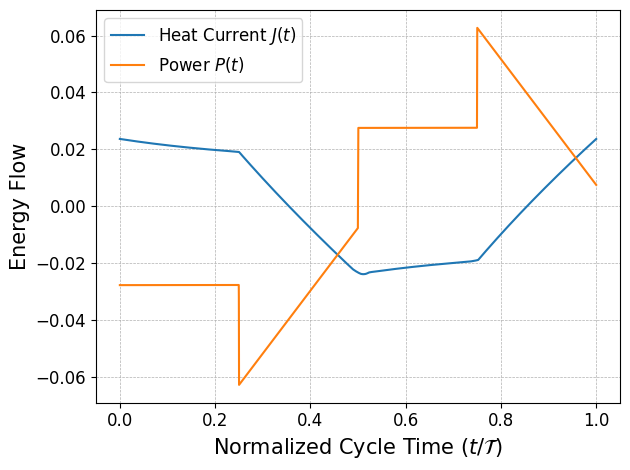

Delta_T=0.014548238897396632 Omega=20.0_DONE

 E_ERROR_SUM=1.490351753119512e-08



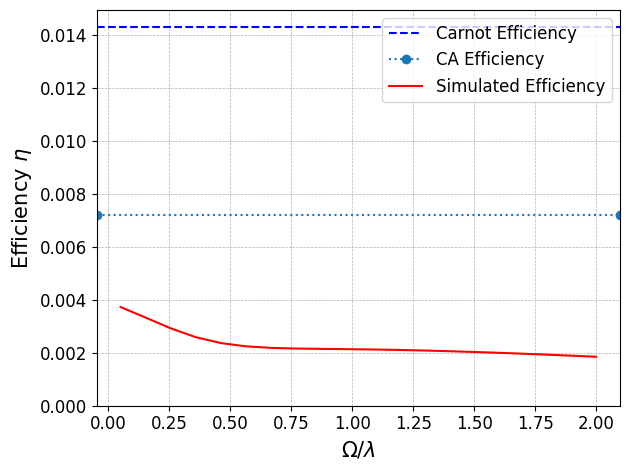

Omega=0.5



/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


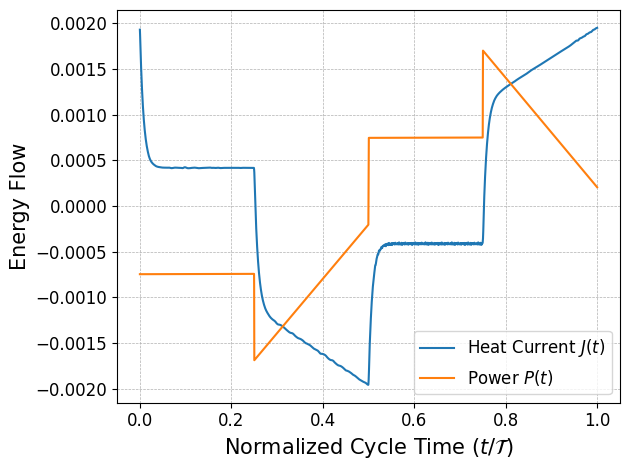

Delta_T=0.015741507870753936 Omega=0.5_DONE

 E_ERROR_SUM=9.227188596527824e-10

Delta_T=0.015741507870753936 Omega=1.5263157894736843_DONE

 E_ERROR_SUM=2.856487935076757e-09

Delta_T=0.015741507870753936 Omega=2.5526315789473686_DONE

 E_ERROR_SUM=4.68096786332417e-09

Delta_T=0.015741507870753936 Omega=3.578947368421053_DONE

 E_ERROR_SUM=6.162446997137749e-09

Delta_T=0.015741507870753936 Omega=4.605263157894737_DONE

 E_ERROR_SUM=7.374246237951132e-09

Delta_T=0.015741507870753936 Omega=5.631578947368421_DONE

 E_ERROR_SUM=8.272323243074808e-09

Delta_T=0.015741507870753936 Omega=6.657894736842106_DONE

 E_ERROR_SUM=9.15044645610763e-09

Delta_T=0.015741507870753936 Omega=7.68421052631579_DONE

 E_ERROR_SUM=9.93090099044025e-09

Delta_T=0.015741507870753936 Omega=8.710526315789474_DONE

 E_ERROR_SUM=1.0819477869183913e-08

Delta_T=0.015741507870753936 Omega=9.73684210526316_DONE

 E_ERROR_SUM=1.1578077163676426e-08

Delta_T=0.015741507870753936 Omega=10.763157894736842_DONE

 E_ER

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


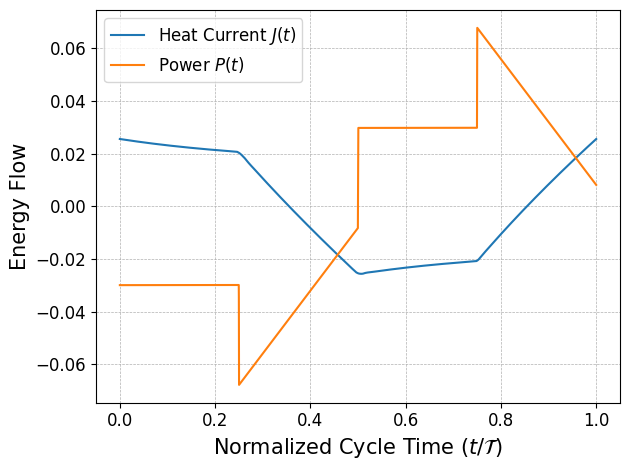

Delta_T=0.015741507870753936 Omega=20.0_DONE

 E_ERROR_SUM=1.7399473861701154e-08



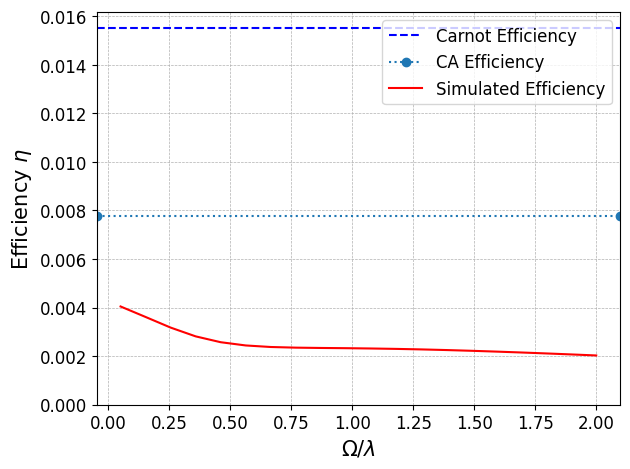

Omega=0.5



/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


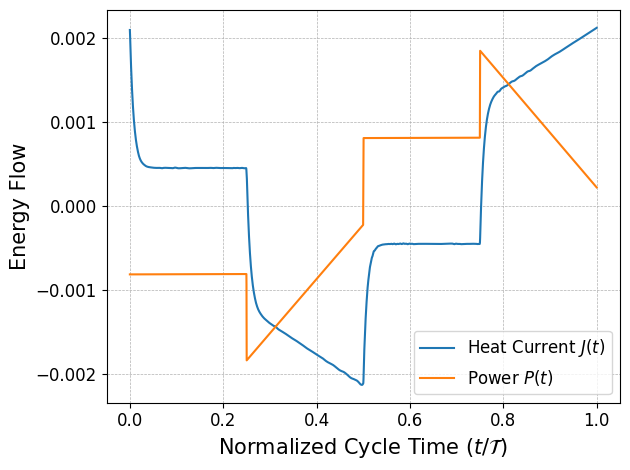

Delta_T=0.017148014440433214 Omega=0.5_DONE

 E_ERROR_SUM=1.0931238275668775e-09

Delta_T=0.017148014440433214 Omega=1.5263157894736843_DONE

 E_ERROR_SUM=3.359170053229832e-09

Delta_T=0.017148014440433214 Omega=2.5526315789473686_DONE

 E_ERROR_SUM=5.585989087952825e-09

Delta_T=0.017148014440433214 Omega=3.578947368421053_DONE

 E_ERROR_SUM=7.339780186410572e-09

Delta_T=0.017148014440433214 Omega=4.605263157894737_DONE

 E_ERROR_SUM=8.695082126530806e-09

Delta_T=0.017148014440433214 Omega=5.631578947368421_DONE

 E_ERROR_SUM=9.856332860991301e-09

Delta_T=0.017148014440433214 Omega=6.657894736842106_DONE

 E_ERROR_SUM=1.0780083048445022e-08

Delta_T=0.017148014440433214 Omega=7.68421052631579_DONE

 E_ERROR_SUM=1.1814047518043935e-08

Delta_T=0.017148014440433214 Omega=8.710526315789474_DONE

 E_ERROR_SUM=1.2748929245631757e-08

Delta_T=0.017148014440433214 Omega=9.73684210526316_DONE

 E_ERROR_SUM=1.3797204712062694e-08

Delta_T=0.017148014440433214 Omega=10.763157894736842_DONE


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


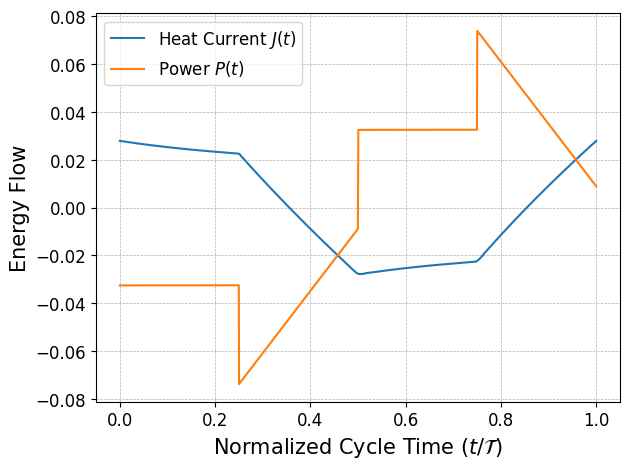

Delta_T=0.017148014440433214 Omega=20.0_DONE

 E_ERROR_SUM=2.068311655278876e-08



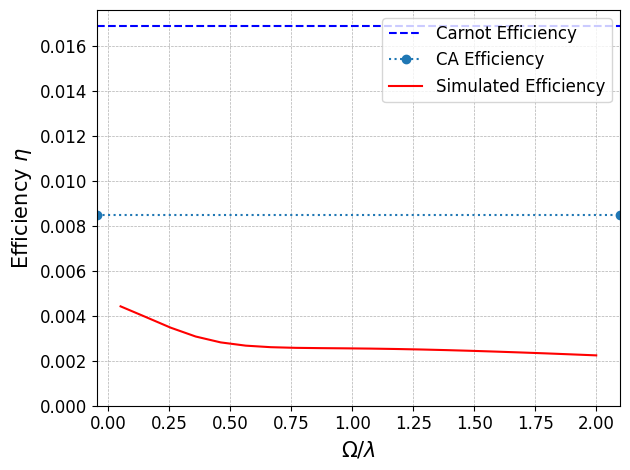

Omega=0.5



/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


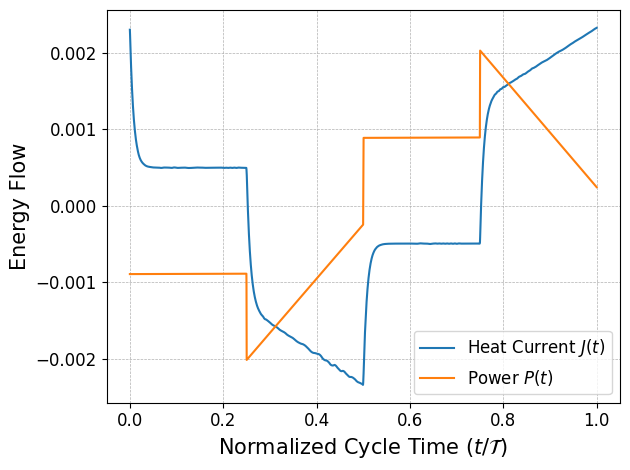

Delta_T=0.01883052527254708 Omega=0.5_DONE

 E_ERROR_SUM=1.3278737970301435e-09

Delta_T=0.01883052527254708 Omega=1.5263157894736843_DONE

 E_ERROR_SUM=4.085037919043799e-09

Delta_T=0.01883052527254708 Omega=2.5526315789473686_DONE

 E_ERROR_SUM=6.754826586963247e-09

Delta_T=0.01883052527254708 Omega=3.578947368421053_DONE

 E_ERROR_SUM=8.930785347360803e-09

Delta_T=0.01883052527254708 Omega=4.605263157894737_DONE

 E_ERROR_SUM=1.0500422902709472e-08

Delta_T=0.01883052527254708 Omega=5.631578947368421_DONE

 E_ERROR_SUM=1.188587067657565e-08

Delta_T=0.01883052527254708 Omega=6.657894736842106_DONE

 E_ERROR_SUM=1.3011362431925022e-08

Delta_T=0.01883052527254708 Omega=7.68421052631579_DONE

 E_ERROR_SUM=1.4223051625350536e-08

Delta_T=0.01883052527254708 Omega=8.710526315789474_DONE

 E_ERROR_SUM=1.5471835590474825e-08

Delta_T=0.01883052527254708 Omega=9.73684210526316_DONE

 E_ERROR_SUM=1.6502664568207592e-08

Delta_T=0.01883052527254708 Omega=10.763157894736842_DONE

 E_ERROR_

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


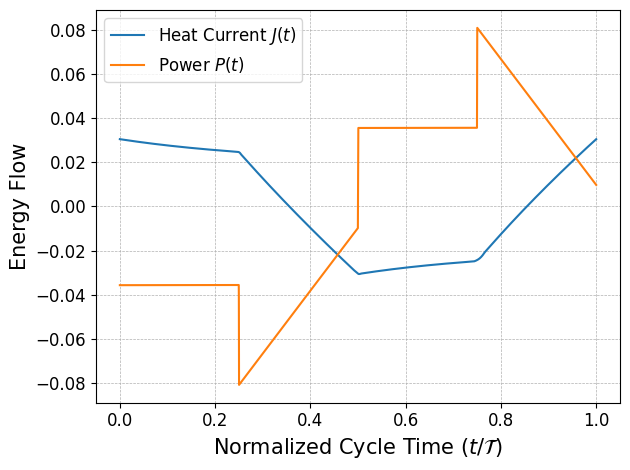

Delta_T=0.01883052527254708 Omega=20.0_DONE

 E_ERROR_SUM=2.482420313754119e-08



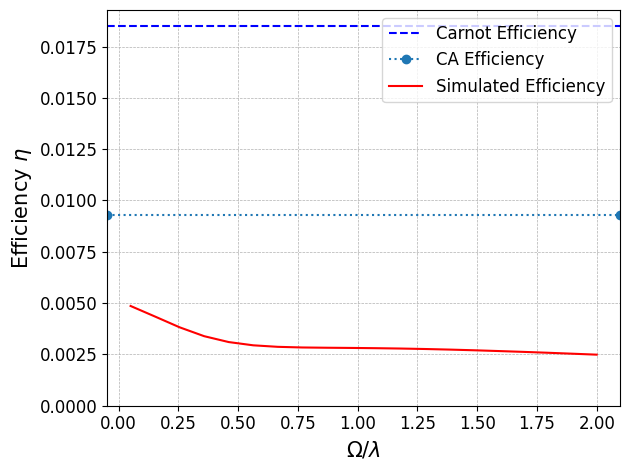

Omega=0.5



/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


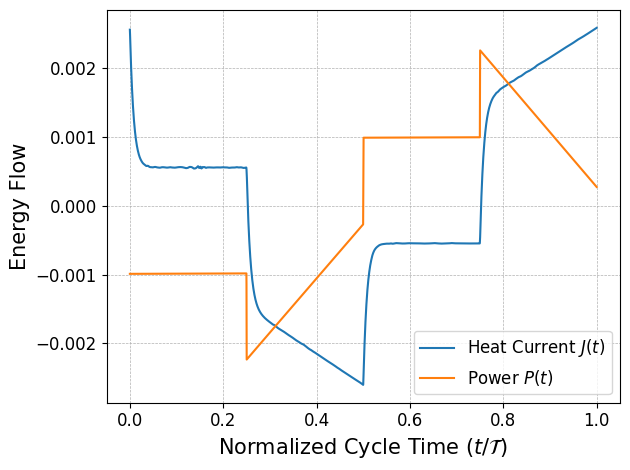

Delta_T=0.02087912087912088 Omega=0.5_DONE

 E_ERROR_SUM=1.620584097472566e-09

Delta_T=0.02087912087912088 Omega=1.5263157894736843_DONE

 E_ERROR_SUM=4.992112723201103e-09

Delta_T=0.02087912087912088 Omega=2.5526315789473686_DONE

 E_ERROR_SUM=8.301323406456618e-09

Delta_T=0.02087912087912088 Omega=3.578947368421053_DONE

 E_ERROR_SUM=1.0985002185659454e-08

Delta_T=0.02087912087912088 Omega=4.605263157894737_DONE

 E_ERROR_SUM=1.2926611264035825e-08

Delta_T=0.02087912087912088 Omega=5.631578947368421_DONE

 E_ERROR_SUM=1.461504395283697e-08

Delta_T=0.02087912087912088 Omega=6.657894736842106_DONE

 E_ERROR_SUM=1.6119691470528608e-08

Delta_T=0.02087912087912088 Omega=7.68421052631579_DONE

 E_ERROR_SUM=1.7609945945906702e-08

Delta_T=0.02087912087912088 Omega=8.710526315789474_DONE

 E_ERROR_SUM=1.8868634654722882e-08

Delta_T=0.02087912087912088 Omega=9.73684210526316_DONE

 E_ERROR_SUM=2.050123093511047e-08

Delta_T=0.02087912087912088 Omega=10.763157894736842_DONE

 E_ERROR_S

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


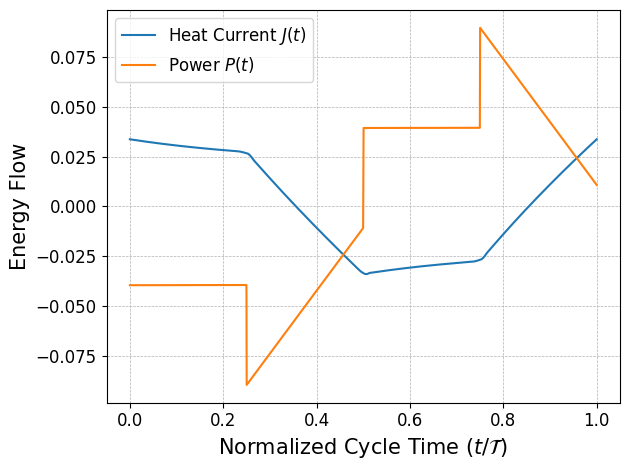

Delta_T=0.02087912087912088 Omega=20.0_DONE

 E_ERROR_SUM=3.030060646835864e-08



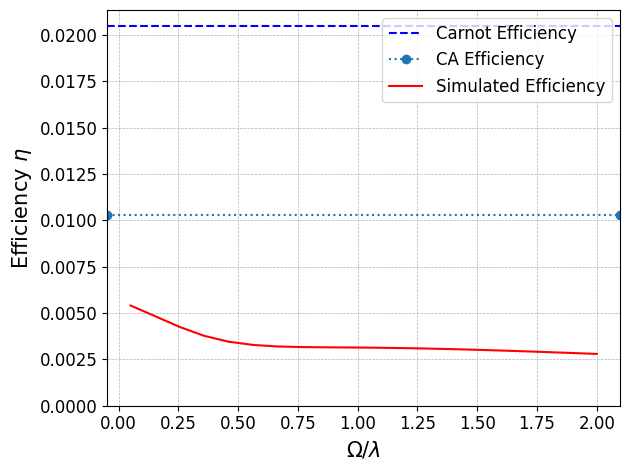

Omega=0.5



/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


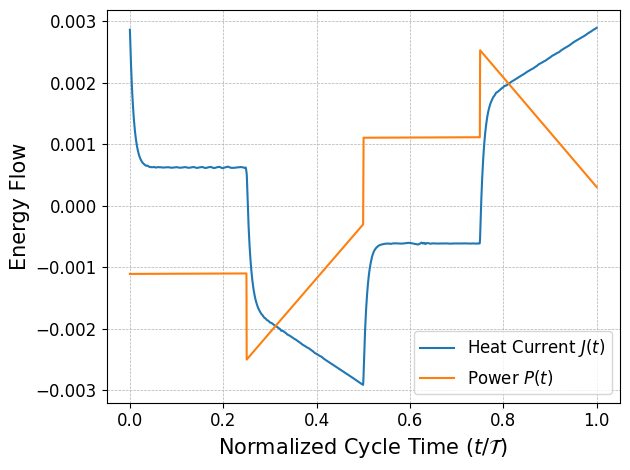

Delta_T=0.02342786683107275 Omega=0.5_DONE

 E_ERROR_SUM=2.026942502730833e-09

Delta_T=0.02342786683107275 Omega=1.5263157894736843_DONE

 E_ERROR_SUM=6.327477763967693e-09

Delta_T=0.02342786683107275 Omega=2.5526315789473686_DONE

 E_ERROR_SUM=1.0364094249482037e-08

Delta_T=0.02342786683107275 Omega=3.578947368421053_DONE

 E_ERROR_SUM=1.3729023251585204e-08

Delta_T=0.02342786683107275 Omega=4.605263157894737_DONE

 E_ERROR_SUM=1.6347727990750904e-08

Delta_T=0.02342786683107275 Omega=5.631578947368421_DONE

 E_ERROR_SUM=1.828266771308762e-08

Delta_T=0.02342786683107275 Omega=6.657894736842106_DONE

 E_ERROR_SUM=2.0294332991888098e-08

Delta_T=0.02342786683107275 Omega=7.68421052631579_DONE

 E_ERROR_SUM=2.1917129000570412e-08

Delta_T=0.02342786683107275 Omega=8.710526315789474_DONE

 E_ERROR_SUM=2.3980930130562683e-08

Delta_T=0.02342786683107275 Omega=9.73684210526316_DONE

 E_ERROR_SUM=2.5720445107069168e-08

Delta_T=0.02342786683107275 Omega=10.763157894736842_DONE

 E_ERROR

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


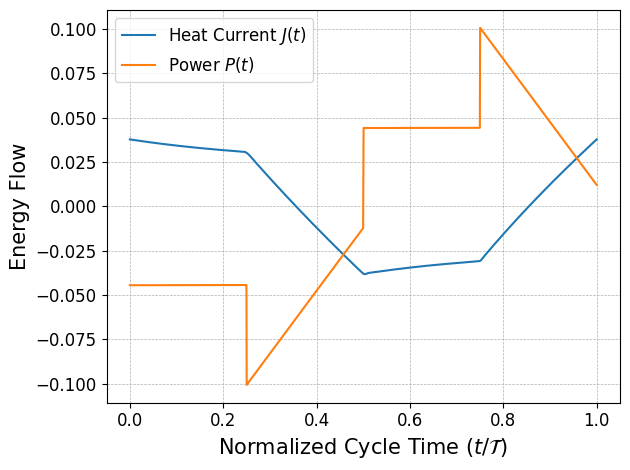

Delta_T=0.02342786683107275 Omega=20.0_DONE

 E_ERROR_SUM=3.84888272364492e-08



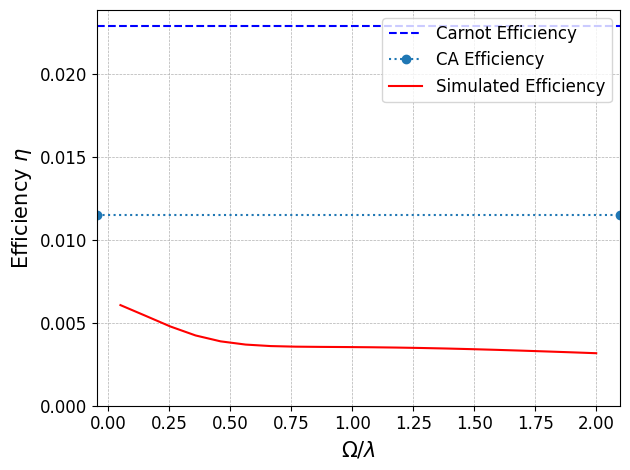

Omega=0.5



/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


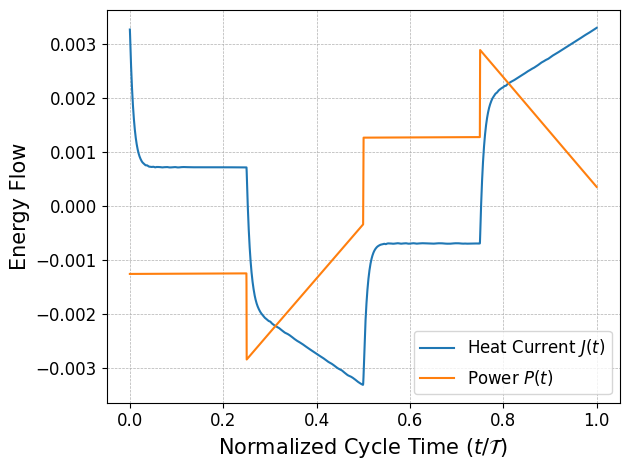

Delta_T=0.026685393258426966 Omega=0.5_DONE

 E_ERROR_SUM=2.6775932721045947e-09

Delta_T=0.026685393258426966 Omega=1.5263157894736843_DONE

 E_ERROR_SUM=8.195353562445717e-09

Delta_T=0.026685393258426966 Omega=2.5526315789473686_DONE

 E_ERROR_SUM=1.3528893449965551e-08

Delta_T=0.026685393258426966 Omega=3.578947368421053_DONE

 E_ERROR_SUM=1.783985592584969e-08

Delta_T=0.026685393258426966 Omega=4.605263157894737_DONE

 E_ERROR_SUM=2.1179999948328643e-08

Delta_T=0.026685393258426966 Omega=5.631578947368421_DONE

 E_ERROR_SUM=2.360704892678811e-08

Delta_T=0.026685393258426966 Omega=6.657894736842106_DONE

 E_ERROR_SUM=2.6374469275225465e-08

Delta_T=0.026685393258426966 Omega=7.68421052631579_DONE

 E_ERROR_SUM=2.8424406384175427e-08

Delta_T=0.026685393258426966 Omega=8.710526315789474_DONE

 E_ERROR_SUM=3.089189215543797e-08

Delta_T=0.026685393258426966 Omega=9.73684210526316_DONE

 E_ERROR_SUM=3.3191216441963434e-08

Delta_T=0.026685393258426966 Omega=10.763157894736842_DONE

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


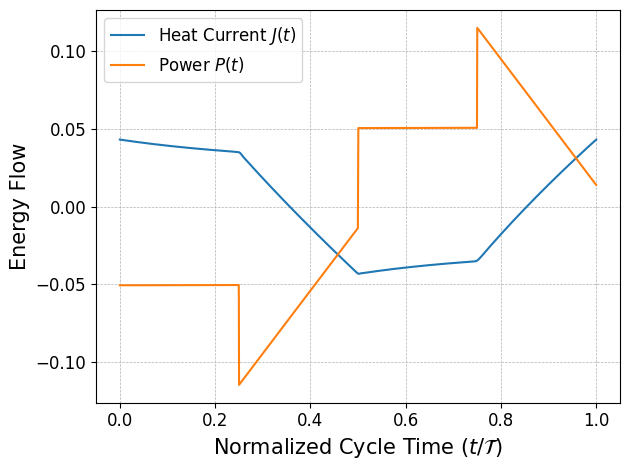

Delta_T=0.026685393258426966 Omega=20.0_DONE

 E_ERROR_SUM=4.988331170352467e-08



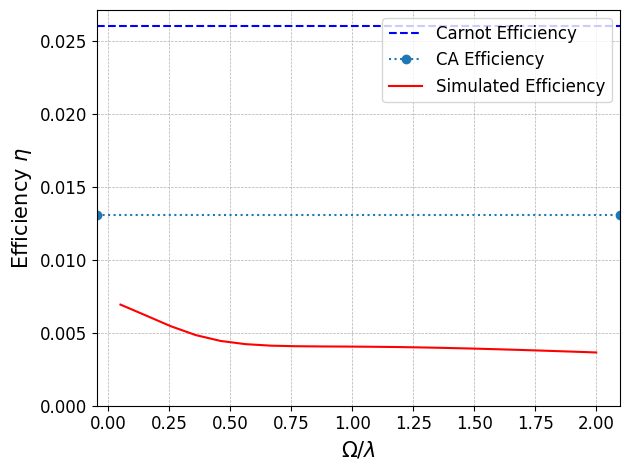

Omega=0.5



/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


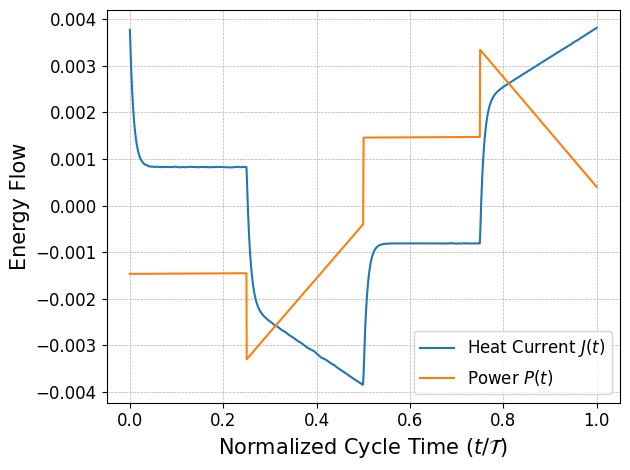

Delta_T=0.03099510603588907 Omega=0.5_DONE

 E_ERROR_SUM=3.571457102280462e-09

Delta_T=0.03099510603588907 Omega=1.5263157894736843_DONE

 E_ERROR_SUM=1.105527180911281e-08

Delta_T=0.03099510603588907 Omega=2.5526315789473686_DONE

 E_ERROR_SUM=1.8231548992719837e-08

Delta_T=0.03099510603588907 Omega=3.578947368421053_DONE

 E_ERROR_SUM=2.4015586130854416e-08

Delta_T=0.03099510603588907 Omega=4.605263157894737_DONE

 E_ERROR_SUM=2.8508872790267148e-08

Delta_T=0.03099510603588907 Omega=5.631578947368421_DONE

 E_ERROR_SUM=3.2255999371511024e-08

Delta_T=0.03099510603588907 Omega=6.657894736842106_DONE

 E_ERROR_SUM=3.541831083975211e-08

Delta_T=0.03099510603588907 Omega=7.68421052631579_DONE

 E_ERROR_SUM=3.849905683139809e-08

Delta_T=0.03099510603588907 Omega=8.710526315789474_DONE

 E_ERROR_SUM=4.165891076546302e-08

Delta_T=0.03099510603588907 Omega=9.73684210526316_DONE

 E_ERROR_SUM=4.450337209860322e-08

Delta_T=0.03099510603588907 Omega=10.763157894736842_DONE

 E_ERROR_SU

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


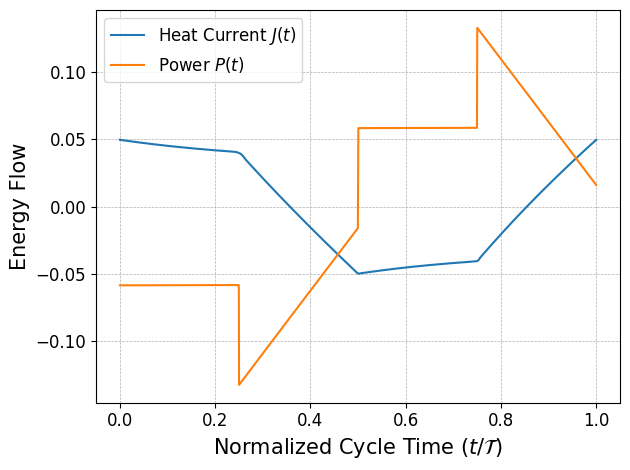

Delta_T=0.03099510603588907 Omega=20.0_DONE

 E_ERROR_SUM=6.71912712135736e-08



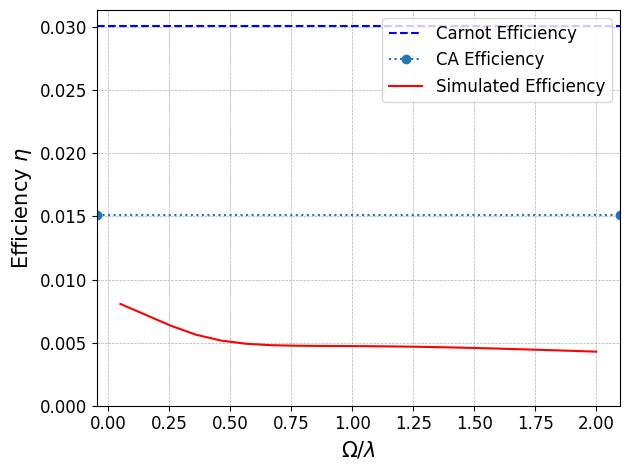

Omega=0.5



/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


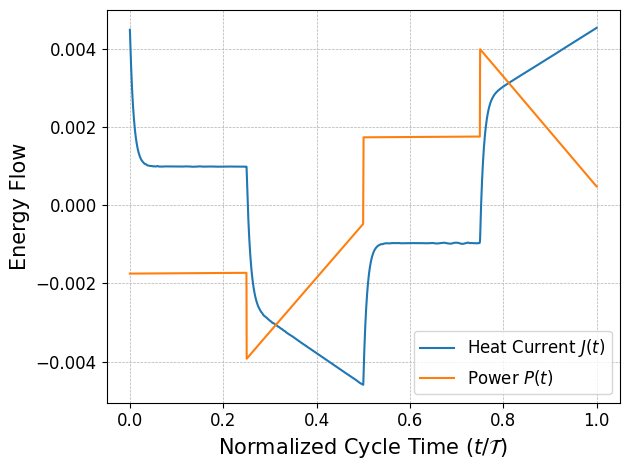

Delta_T=0.03696498054474708 Omega=0.5_DONE

 E_ERROR_SUM=5.123919288863021e-09

Delta_T=0.03696498054474708 Omega=1.5263157894736843_DONE

 E_ERROR_SUM=1.5664184505048695e-08

Delta_T=0.03696498054474708 Omega=2.5526315789473686_DONE

 E_ERROR_SUM=2.596284420786077e-08

Delta_T=0.03696498054474708 Omega=3.578947368421053_DONE

 E_ERROR_SUM=3.4333119902640874e-08

Delta_T=0.03696498054474708 Omega=4.605263157894737_DONE

 E_ERROR_SUM=4.053823426941605e-08

Delta_T=0.03696498054474708 Omega=5.631578947368421_DONE

 E_ERROR_SUM=4.577430406937921e-08

Delta_T=0.03696498054474708 Omega=6.657894736842106_DONE

 E_ERROR_SUM=5.01874829472726e-08

Delta_T=0.03696498054474708 Omega=7.68421052631579_DONE

 E_ERROR_SUM=5.468617469972514e-08

Delta_T=0.03696498054474708 Omega=8.710526315789474_DONE

 E_ERROR_SUM=5.944794967405187e-08

Delta_T=0.03696498054474708 Omega=9.73684210526316_DONE

 E_ERROR_SUM=6.379359662744832e-08

Delta_T=0.03696498054474708 Omega=10.763157894736842_DONE

 E_ERROR_SUM=6

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


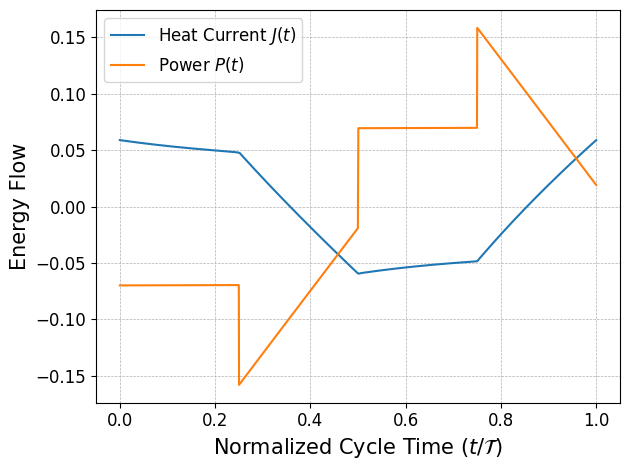

Delta_T=0.03696498054474708 Omega=20.0_DONE

 E_ERROR_SUM=9.563642322518717e-08



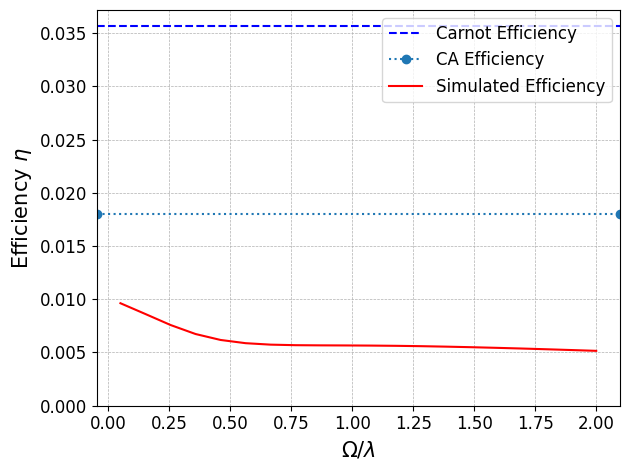

Omega=0.5



/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


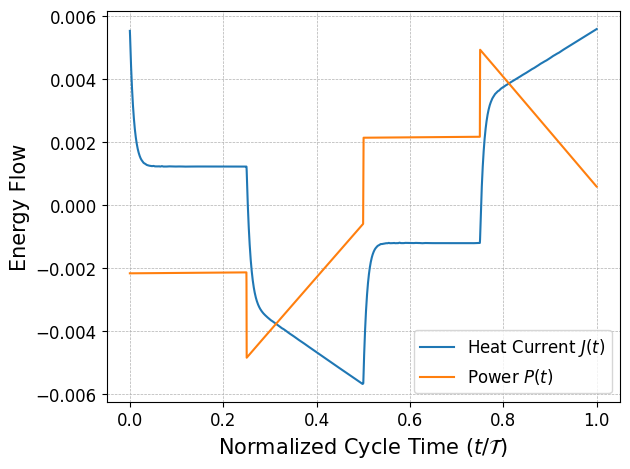

Delta_T=0.045783132530120486 Omega=0.5_DONE

 E_ERROR_SUM=7.850050692814747e-09

Delta_T=0.045783132530120486 Omega=1.5263157894736843_DONE

 E_ERROR_SUM=2.3918129976596703e-08

Delta_T=0.045783132530120486 Omega=2.5526315789473686_DONE

 E_ERROR_SUM=3.969034179096553e-08

Delta_T=0.045783132530120486 Omega=3.578947368421053_DONE

 E_ERROR_SUM=5.247544188069497e-08

Delta_T=0.045783132530120486 Omega=4.605263157894737_DONE

 E_ERROR_SUM=6.230321272782113e-08

Delta_T=0.045783132530120486 Omega=5.631578947368421_DONE

 E_ERROR_SUM=6.959118059590708e-08

Delta_T=0.045783132530120486 Omega=6.657894736842106_DONE

 E_ERROR_SUM=7.705619653464169e-08

Delta_T=0.045783132530120486 Omega=7.68421052631579_DONE

 E_ERROR_SUM=8.399220585708633e-08

Delta_T=0.045783132530120486 Omega=8.710526315789474_DONE

 E_ERROR_SUM=9.069676965012263e-08

Delta_T=0.045783132530120486 Omega=9.73684210526316_DONE

 E_ERROR_SUM=9.750687812726255e-08

Delta_T=0.045783132530120486 Omega=10.763157894736842_DONE

 E_

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


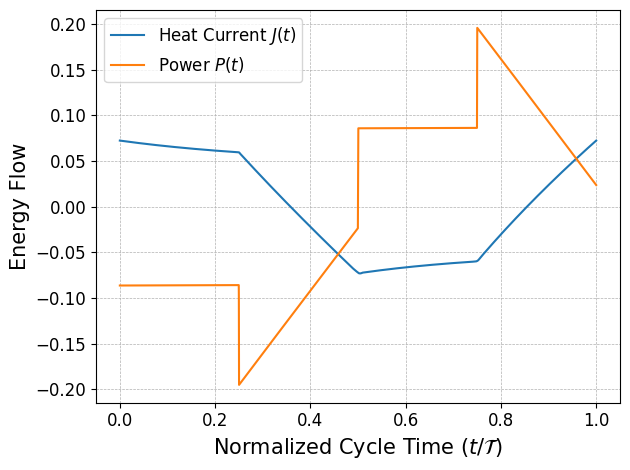

Delta_T=0.045783132530120486 Omega=20.0_DONE

 E_ERROR_SUM=1.4649300261737608e-07



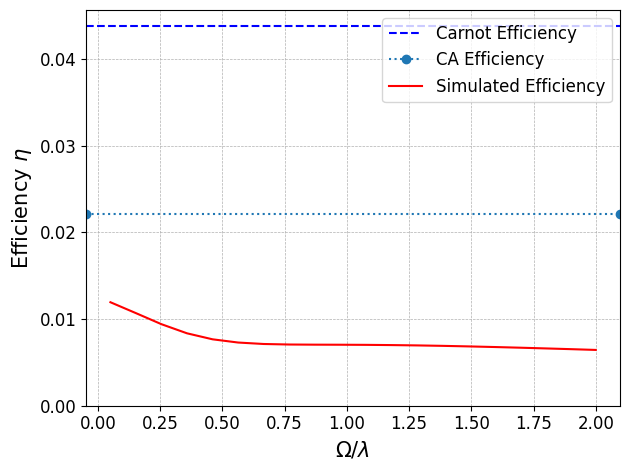

Omega=0.5



/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


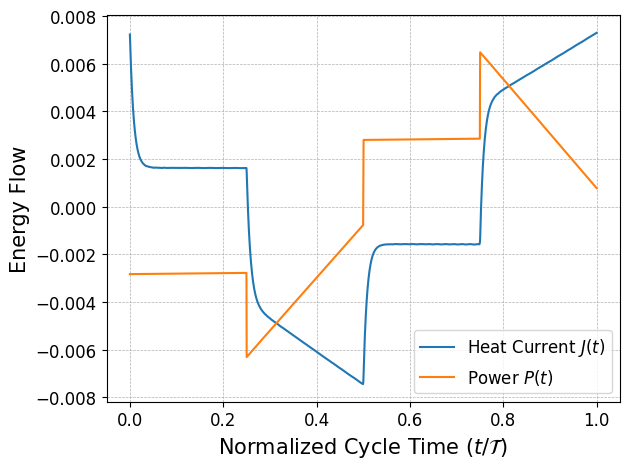

Delta_T=0.060126582278481014 Omega=0.5_DONE

 E_ERROR_SUM=1.348492345565333e-08

Delta_T=0.060126582278481014 Omega=1.5263157894736843_DONE

 E_ERROR_SUM=4.1642999160096394e-08

Delta_T=0.060126582278481014 Omega=2.5526315789473686_DONE

 E_ERROR_SUM=6.860555623600106e-08

Delta_T=0.060126582278481014 Omega=3.578947368421053_DONE

 E_ERROR_SUM=9.016364316272174e-08

Delta_T=0.060126582278481014 Omega=4.605263157894737_DONE

 E_ERROR_SUM=1.0746630590974249e-07

Delta_T=0.060126582278481014 Omega=5.631578947368421_DONE

 E_ERROR_SUM=1.207987022633361e-07

Delta_T=0.060126582278481014 Omega=6.657894736842106_DONE

 E_ERROR_SUM=1.324951028891519e-07

Delta_T=0.060126582278481014 Omega=7.68421052631579_DONE

 E_ERROR_SUM=1.442695061193433e-07

Delta_T=0.060126582278481014 Omega=8.710526315789474_DONE

 E_ERROR_SUM=1.5569113864799533e-07

Delta_T=0.060126582278481014 Omega=9.73684210526316_DONE

 E_ERROR_SUM=1.6804529057168338e-07

Delta_T=0.060126582278481014 Omega=10.763157894736842_DONE



/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


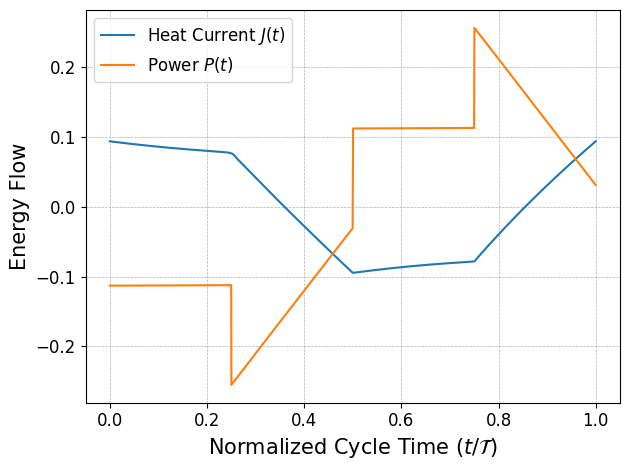

Delta_T=0.060126582278481014 Omega=20.0_DONE

 E_ERROR_SUM=2.506804719359934e-07



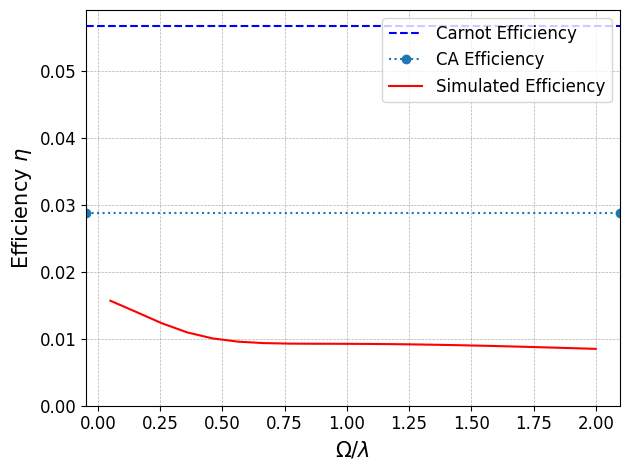

Omega=0.5



/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


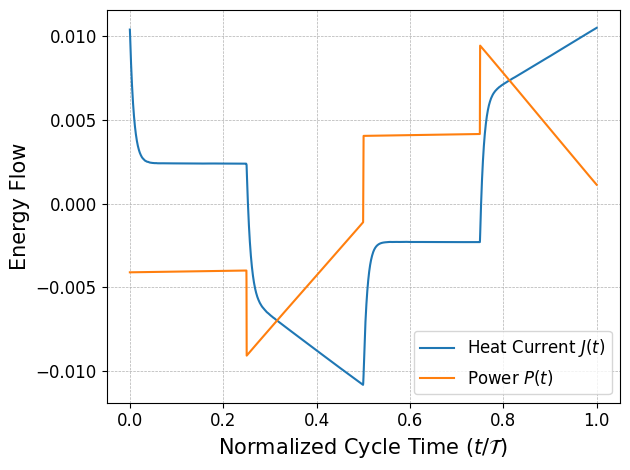

Delta_T=0.08755760368663595 Omega=0.5_DONE

 E_ERROR_SUM=2.8591687184498227e-08

Delta_T=0.08755760368663595 Omega=1.5263157894736843_DONE

 E_ERROR_SUM=8.84355028096806e-08

Delta_T=0.08755760368663595 Omega=2.5526315789473686_DONE

 E_ERROR_SUM=1.4512882196004995e-07

Delta_T=0.08755760368663595 Omega=3.578947368421053_DONE

 E_ERROR_SUM=1.9193943723294637e-07

Delta_T=0.08755760368663595 Omega=4.605263157894737_DONE

 E_ERROR_SUM=2.2678945887921742e-07

Delta_T=0.08755760368663595 Omega=5.631578947368421_DONE

 E_ERROR_SUM=2.5510609891199465e-07

Delta_T=0.08755760368663595 Omega=6.657894736842106_DONE

 E_ERROR_SUM=2.8069332813629444e-07

Delta_T=0.08755760368663595 Omega=7.68421052631579_DONE

 E_ERROR_SUM=3.066481926161657e-07

Delta_T=0.08755760368663595 Omega=8.710526315789474_DONE

 E_ERROR_SUM=3.3084234551949976e-07

Delta_T=0.08755760368663595 Omega=9.73684210526316_DONE

 E_ERROR_SUM=3.542738769013454e-07

Delta_T=0.08755760368663595 Omega=10.763157894736842_DONE

 E_ERROR_

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


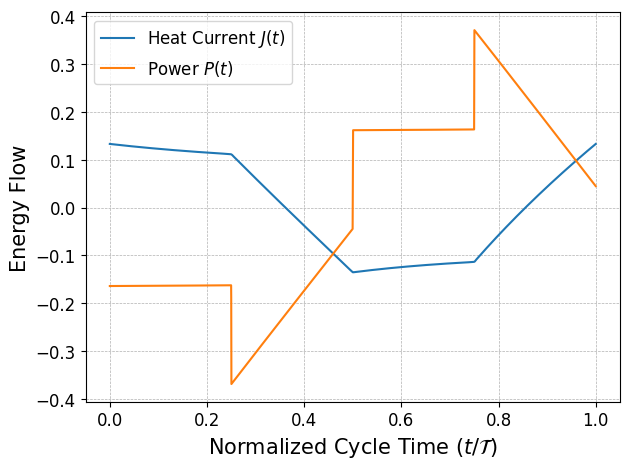

Delta_T=0.08755760368663595 Omega=20.0_DONE

 E_ERROR_SUM=5.284542048400453e-07



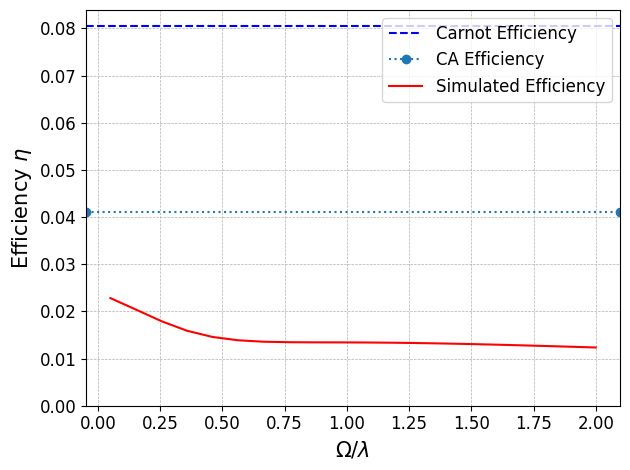

Omega=0.5



/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


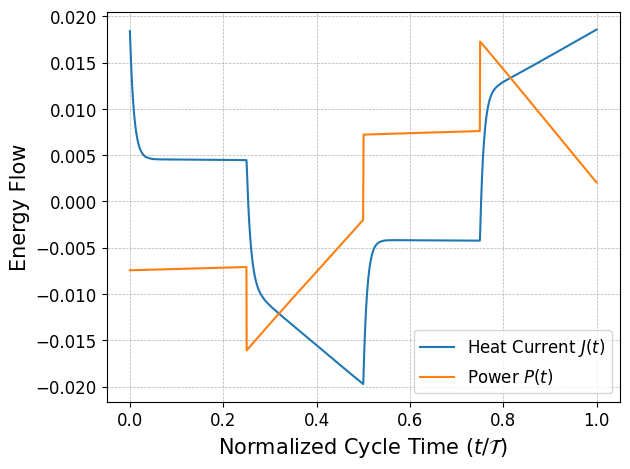

Delta_T=0.1610169491525424 Omega=0.5_DONE

 E_ERROR_SUM=9.596881067608365e-08

Delta_T=0.1610169491525424 Omega=1.5263157894736843_DONE

 E_ERROR_SUM=2.974905317643106e-07

Delta_T=0.1610169491525424 Omega=2.5526315789473686_DONE

 E_ERROR_SUM=4.908454531715734e-07

Delta_T=0.1610169491525424 Omega=3.578947368421053_DONE

 E_ERROR_SUM=6.464923763549457e-07

Delta_T=0.1610169491525424 Omega=4.605263157894737_DONE

 E_ERROR_SUM=7.596690755340418e-07

Delta_T=0.1610169491525424 Omega=5.631578947368421_DONE

 E_ERROR_SUM=8.562191249339435e-07

Delta_T=0.1610169491525424 Omega=6.657894736842106_DONE

 E_ERROR_SUM=9.416178432530842e-07

Delta_T=0.1610169491525424 Omega=7.68421052631579_DONE

 E_ERROR_SUM=1.0273794393000912e-06

Delta_T=0.1610169491525424 Omega=8.710526315789474_DONE

 E_ERROR_SUM=1.1065386171793534e-06

Delta_T=0.1610169491525424 Omega=9.73684210526316_DONE

 E_ERROR_SUM=1.1886276887196345e-06

Delta_T=0.1610169491525424 Omega=10.763157894736842_DONE

 E_ERROR_SUM=1.26800801

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


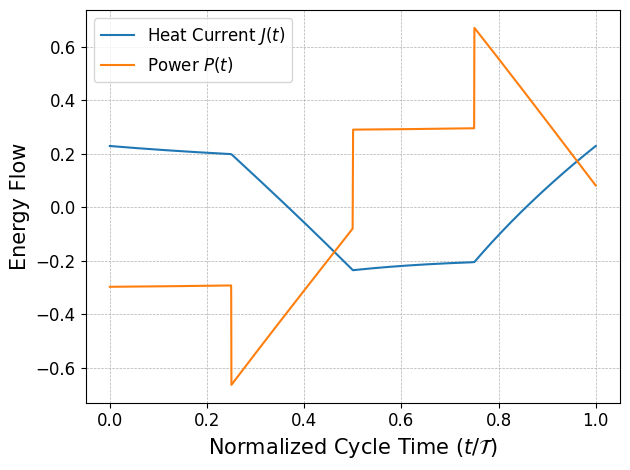

Delta_T=0.1610169491525424 Omega=20.0_DONE

 E_ERROR_SUM=1.746132483049223e-06



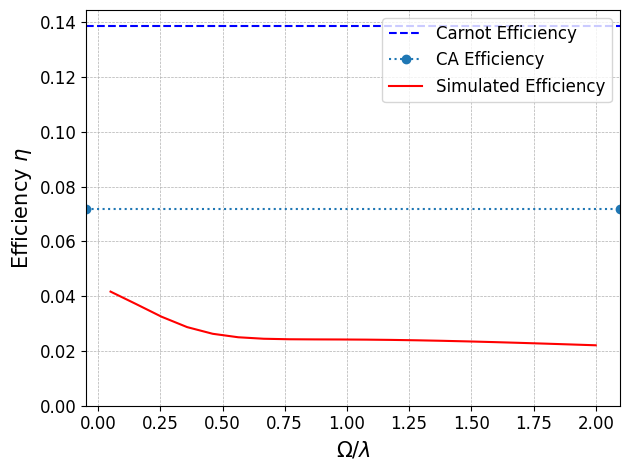

Omega=0.5



/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


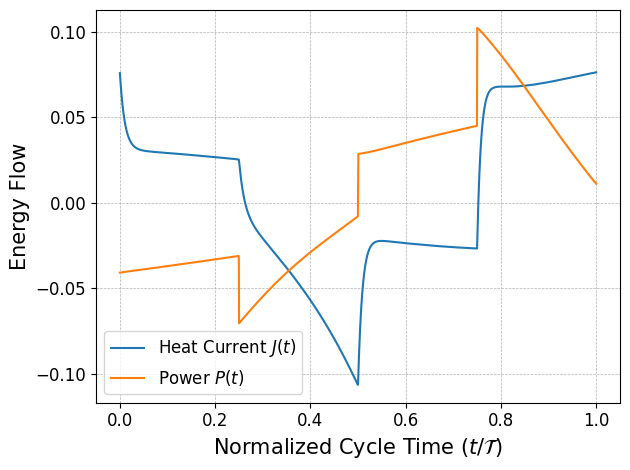

Delta_T=1.0 Omega=0.5_DONE

 E_ERROR_SUM=3.476934973933865e-06

Delta_T=1.0 Omega=1.5263157894736843_DONE

 E_ERROR_SUM=1.1219903720549596e-05

Delta_T=1.0 Omega=2.5526315789473686_DONE

 E_ERROR_SUM=1.876725490701503e-05

Delta_T=1.0 Omega=3.578947368421053_DONE

 E_ERROR_SUM=2.4519770235542637e-05

Delta_T=1.0 Omega=4.605263157894737_DONE

 E_ERROR_SUM=2.8526278779139602e-05

Delta_T=1.0 Omega=5.631578947368421_DONE

 E_ERROR_SUM=3.157294774780439e-05

Delta_T=1.0 Omega=6.657894736842106_DONE

 E_ERROR_SUM=3.4095715214732536e-05

Delta_T=1.0 Omega=7.68421052631579_DONE

 E_ERROR_SUM=3.6661811051885707e-05

Delta_T=1.0 Omega=8.710526315789474_DONE

 E_ERROR_SUM=3.891857120663644e-05

Delta_T=1.0 Omega=9.73684210526316_DONE

 E_ERROR_SUM=4.102265967276253e-05

Delta_T=1.0 Omega=10.763157894736842_DONE

 E_ERROR_SUM=4.2941928327877577e-05

Delta_T=1.0 Omega=11.789473684210527_DONE

 E_ERROR_SUM=4.472210505923613e-05

Delta_T=1.0 Omega=12.815789473684212_DONE

 E_ERROR_SUM=4.618537354872

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


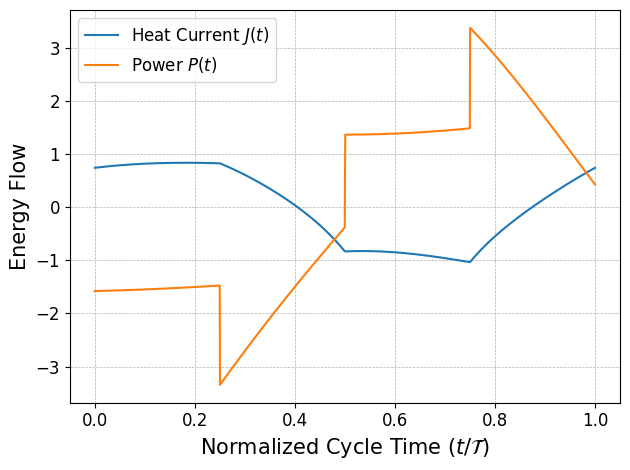

Delta_T=1.0 Omega=20.0_DONE

 E_ERROR_SUM=5.3344939232147226e-05



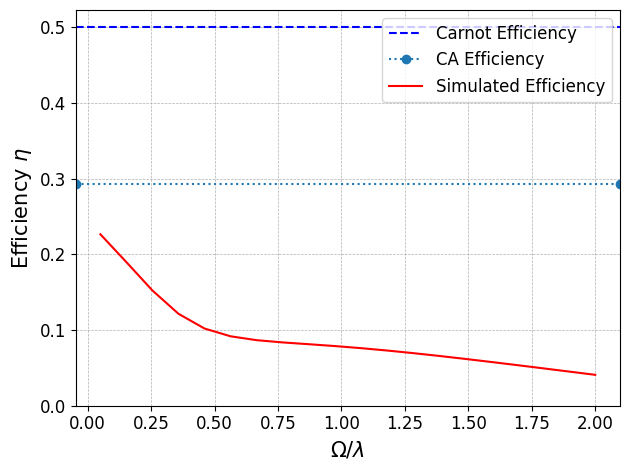

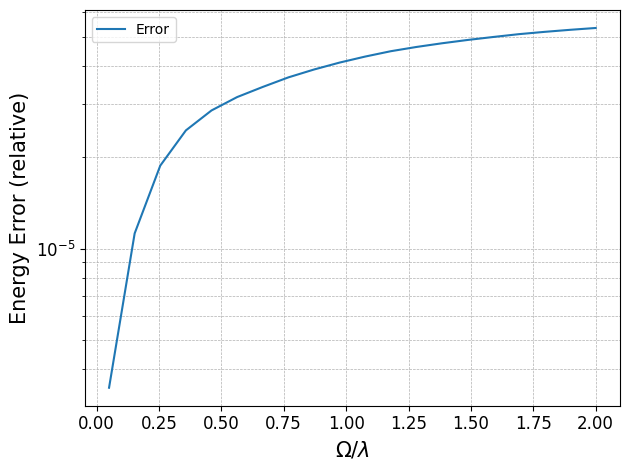

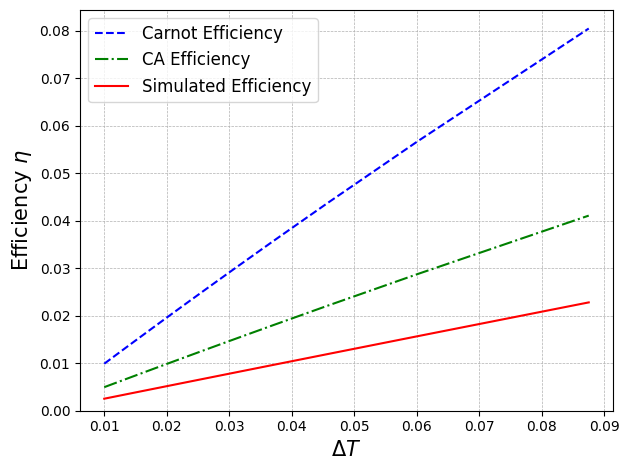

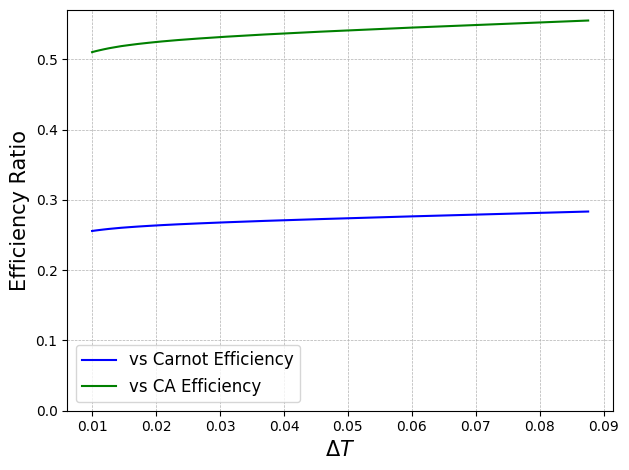

In [ ]:
h_bar = 1
k_B = 1
N = 2

rho_iter = 100
iter_cutoff_num = 90

lamb = 10
omega = 2

kappa_0 = 1




gamma = lamb / (2 * np.cosh(kappa_0))

r = .5

T_0 = 1 # 低温時
Delta_T = .05 #温度幅
Delta_T_min = .005
Delta_T_max = 5
# Delta_T_list = np.linspace(Delta_T_min, Delta_T_max, 4)
# Delta_T_list = [.01, .05, .1, .5]

Delta_beta_max = 100
Delta_beta_min = 1

Delta_beta_list = np.linspace(Delta_beta_min, Delta_beta_max, 20)
Delta_T_list = sorted([1/Delta_beta for Delta_beta in Delta_beta_list])

# Delta_T_list = [.001]

efficiency_DetlaT_list = []
Carnot_efficiency_DeltaT_list = []
CA_efficiency_DeltaT_list = []
efficiency_vs_Carnot_DeltaT_list = []
efficiency_vs_CA_DeltaT_list = []


# P_max_list = []

for Delta_T in Delta_T_list:
  P_max = []
  g = kappa_0  / (np.cosh(kappa_0)**2)
  F_q = Delta_T**2/6.0

  P_0 = ((h_bar * omega * lamb) / 2.0) * ((Delta_T / T_0)**2) * 0.01
  P_theory=(omega*lamb/8.0)*g*F_q/(T_0**2)

  Carnot_efficiency = 1 - (T_0 / (T_0 + Delta_T))
  CA_efficiency = 1 - np.sqrt(T_0 / (T_0 + Delta_T))
  Carnot_efficiency_DeltaT_list.append(Carnot_efficiency)
  CA_efficiency_DeltaT_list.append(CA_efficiency)
  # efficiency_vs_CA_DeltaT_list.append(CA_efficiency)

  # Omega_num = 40
  # OmegaLambda_left = 0.05
  # OmegaLambda_right = 8.0
  Omega_num=20
  OmegaLambda_left = 0.05
  OmegaLambda_right = 2.0

  OmegaLambda_list = np.linspace(OmegaLambda_left, OmegaLambda_right, Omega_num)

  Omega_left = OmegaLambda_left * lamb
  Omega_right = OmegaLambda_right * lamb
  Omega_list = np.linspace(Omega_left, Omega_right, Omega_num)

  def f_q(t, cycle_time):
    t = t / cycle_time
    return (1*Delta_T) if t <= 0.25 else (2 - 4 * t)*Delta_T if t <= 0.5 else 0*Delta_T if t <= 0.75 else (-3 + 4 * t)*Delta_T

  def f_w(t, args):
    cycle_time = args["cycle_time"]
    t = t / cycle_time
    if t <= 0.25:
        return (-np.pi * 0.5 * t + (9 / 20))*Delta_T/T_0
    elif t <= 0.5:
        return (
            -(3 / 2) * np.pi * (t - 1 / 4)
            + np.pi * 0.5 * (4 * (t**2) - 0.25)
            - 0.5 * (4 * t - 1)
            - np.pi * 0.125
            + (9 / 20)
        )*Delta_T/T_0
    elif t <= 0.75:
        return (np.pi * 0.5 * (t - 0.5) - (1 / 20) - np.pi * 0.125)*Delta_T/T_0
    else:
        return (
            -np.pi * 0.5 * (4 * (t**2) - (9 / 4))
            + (7 / 2) * np.pi * (t - 0.75)
            + 0.5 * (4 * t - 3)
            - (1 / 20)
        )*Delta_T/T_0

  def dot_f_w(t, args):
    Tau = args["cycle_time"]
    t = t / Tau
    if t <= 0.25:
        return (-0.5*np.pi/Tau)*(Delta_T/T_0)
    elif t <= 0.5:
        return (
            (-1.5*np.pi/Tau+4.0*np.pi*(t/(Tau**2))-2.0/Tau)*(Delta_T/T_0)
        )*Delta_T/T_0
    elif t <= 0.75:
        return (0.5*np.pi/Tau)*(Delta_T/T_0)
    else:
        return (-4.0*np.pi*(t/(Tau**2))+3.5*np.pi/Tau+2.0/Tau)*(Delta_T/T_0)


  P = []
  P_c = []
  P_d = []
  P_fluc = []

  Heat_in_list = []
  Heat_out_list = []
  Heat_sum_list = []
  Work_out_list = []

  # Efficiency_l
  ist = []

  E_Error_sum_list = []

  # Carnot_efficiency_list = []
  # CA_efficiency_list = []
  efficiency_list = []
  # efficiency_vs_Carnot_list = []
  # efficiency_vs_CA_list = []

  for Omega in Omega_list:

    def T(t, cycle_time):
      return f_q(t, cycle_time) + T_0

    def beta(t, cycle_time):
      return 1/(T(t, cycle_time)*k_B)

    def kappa(t, args):
      cycle_time = args["cycle_time"]
      return np.sqrt((1+ r*f_w(t, args))**2+(1-r)**2*f_w(t, args)**2)/2*h_bar*omega*beta(t, cycle_time)

    def gamma_plus(t, args):
      cycle_time = args["cycle_time"]
      return gamma * np.exp(-kappa(t, args))

    def gamma_minus(t, args):
      cycle_time = args["cycle_time"]
      return gamma * np.exp(kappa(t, args))

        # 時間依存昇降演算子の生成
    def jump_operator_t_plus(t, args):

        # 時刻 t のハミルトニアン
        H_t = H[0] + H[1][0] * H[1][1](t, args)
        # 固有値と固有ベクトルを計算
        eigenvalues, eigenvectors = H_t.eigenstates()
        # 固有基底に基づく昇降演算子（例: 基底状態 -> 励起状態）
        ground_state = eigenvectors[0]  # 固有値が最小の状態
        excited_state = eigenvectors[1]  # 他の固有状態
        # 昇降演算子を構築
        tmp=Qobj(np.sqrt(gamma_plus(t,args)) * (excited_state * ground_state.dag()))
        return tmp

    # 時間依存昇降演算子の生成
    def jump_operator_t_minus(t, args):
        # 時刻 t のハミルトニアン
        H_t = H[0] + H[1][0] * H[1][1](t, args)
        # 固有値と固有ベクトルを計算
        eigenvalues, eigenvectors = H_t.eigenstates()
        # 固有基底に基づく昇降演算子（例: 基底状態 -> 励起状態）
        ground_state = eigenvectors[0]  # 固有値が最小の状態
        excited_state = eigenvectors[1]  # 他の固有状態
        # 昇降演算子を構築
        return Qobj(np.sqrt(gamma_minus(t,args)) * (ground_state * excited_state.dag()))

    # 時間依存エネルギー固有値、固有状態
    def E_t_states(t, args):
      H_t = H[0] + H[1][0] * H[1][1](t, args)
      return H_t.eigenstates()

    t_num = 5000
    Tau = 2*np.pi/Omega
    t_list = np.linspace(0, Tau, t_num)
    Delta_t = Tau/t_num

    psi_Omega = (((1-r)/r)**2) * (np.sinh(2*kappa_0) / (4 * kappa_0)) * ((Omega**2) / ((Omega**2) + (omega**2) + (lamb**2)/4.0))
    P_max.append(((h_bar * omega * lamb/ 8.0) * (g / (1 + psi_Omega)) * (F_q / (T_0**2))) / P_0)

    H_sys = h_bar*omega * 0.5 * sigmaz()
    H_int = [h_bar*omega * 0.5 * (r*sigmaz() + (1-r)*sigmax()), f_w]
    H = [H_sys, H_int]
    L = [[jump_operator_t_plus], [jump_operator_t_minus]]

    args = {"cycle_time":(2*np.pi/Omega)}
    args_list = [args for _ in t_list]

    rho_00=np.exp(-0.5*omega/(T_0+Delta_T))/(np.exp(-0.5*omega/(T_0+Delta_T))+np.exp(0.5*omega/(T_0+Delta_T)))
    rho_11=np.exp(0.5*omega/(T_0+Delta_T))/(np.exp(-0.5*omega/(T_0+Delta_T))+np.exp(0.5*omega/(T_0+Delta_T)))
    rho = ket2dm((basis(N, 0)*rho_00+basis(N, 1)*rho_11).unit())

    H_Qobj_list = [(H[0] + H[1][0] * h) for h in map(H[1][1], t_list, args_list)]
    H_list = [(H[0] + H[1][0] * h).full() for h in map(H[1][1], t_list, args_list)]
    H_dot_list = list(map(Qobj, np.gradient(H_list, Delta_t, axis=0)))
    H_dot_square_list = [H_dot_list[idx] * H_dot_list[idx] for idx in range(len(H_dot_list))] # NEW
    H_at_Omega = TimeDependentEigenSystem(H, t_list)

    process_window = int(t_num/4)
    first_endpoint = 0 + process_window
    second_endpoint = first_endpoint + process_window
    third_endpoint = second_endpoint + process_window
    fourth_endpoint = third_endpoint + process_window

    P_Omega = []
    P_d_Omega =[]

    P_fluc_Omega = []

    Heat_Omega = []

    Heat_in_iter_list = []
    Heat_out_iter_list = []
    Heat_sum_iter_list = []
    Work_out_iter_list = []
    Dot_Energy_iter_list = []

    for iter in range(rho_iter):
      result = mesolve(H, rho, t_list, c_ops = L, args = args)
      rho = result.states[-1]

      if iter >= iter_cutoff_num:
        rho_list = [state.full() for state in result.states]
        dot_rho_list = list(map(Qobj, np.gradient(rho_list, Delta_t, axis=0)))
        Heat_list = [(Qobj(H_list[idx]) * Qobj(dot_rho_list[idx])).tr() for idx in range(len(result.states))]

        Energy_list =[(Qobj(H_list[idx]) * Qobj(rho_list[idx])).tr() for idx in range(len(result.states))]
        dot_Energy_list = np.gradient(Energy_list, Delta_t, axis=0)
        dot_Energy_sum = sum(dot_Energy_list)

        dot_Energy_1st_process_sum = sum(dot_Energy_list[:first_endpoint])
        dot_Energy_2st_process_sum = sum(dot_Energy_list[first_endpoint:second_endpoint])
        dot_Energy_3nd_process_sum = sum(dot_Energy_list[second_endpoint:third_endpoint])
        dot_Energy_4rd_process_sum = sum(dot_Energy_list[third_endpoint:])

        # Heat_in = sum(Heat_list[:first_endpoint])+sum(Heat_list[third_endpoint:])
        Heat_in = sum(heat for heat in Heat_list if heat.real > 0)
        Heat_out = -sum(heat for heat in Heat_list if heat.real < 0)
        Heat_sum = Heat_in-Heat_out

        Heat_1st_process_sum = sum(Heat_list[:first_endpoint])
        Heat_2st_process_sum = sum(Heat_list[first_endpoint:second_endpoint])
        Heat_3nd_process_sum = sum(Heat_list[second_endpoint:third_endpoint])
        Heat_4rd_process_sum = sum(Heat_list[third_endpoint:])

        Heat_Omega+=Heat_list

        Work_list = [-(H_Qobj_list[idx] * result.states[idx]).tr() for idx in range(len(result.states))]
        #Work_list = [-(H_Qobj_list[idx] * result.states[idx]).tr() for idx in range(len(result.states))]

        Power_list = [-(H_dot_list[idx] * result.states[idx]).tr() for idx in range(len(result.states))]
        P_Omega+=Power_list
        Work_out = sum(Power_list)

        Power_1st_process_sum = sum(Power_list[:first_endpoint])
        Power_2st_process_sum = sum(Power_list[first_endpoint:second_endpoint])
        Power_3nd_process_sum = sum(Power_list[second_endpoint:third_endpoint])
        Power_4rd_process_sum = sum(Power_list[third_endpoint:])

        Power_fluctuation_list = [(H_dot_square_list[idx] * result.states[idx]).tr() - (Power_list[idx] * Power_list[idx]) for idx in range(len(result.states))]
        P_fluc_Omega += Power_fluctuation_list

        dot_E_t_gs_list = H_at_Omega.get_eigenvalue_derivatives(0)
        dot_E_t_es_list = H_at_Omega.get_eigenvalue_derivatives(1)
        P_d_list = [-(dot_E_t_gs_list[idx] * (H_at_Omega.get_eigenvector(idx, 0).dag() * result.states[idx] * H_at_Omega.get_eigenvector(idx, 0)) + dot_E_t_es_list[idx] * ((H_at_Omega.get_eigenvector(idx, 1).dag() * result.states[idx] * H_at_Omega.get_eigenvector(idx, 1)))) for idx, t in enumerate(t_list)]
        P_d_Omega+=P_d_list

        Heat_in_iter_list.append(Heat_in)
        Heat_out_iter_list.append(Heat_out)
        Heat_sum_iter_list.append(Heat_sum)
        Work_out_iter_list.append(Work_out)
        Dot_Energy_iter_list.append(dot_Energy_sum)

    # Heat_at_Omega = sum(Heat_Omega)*Delta_t / ((rho_iter-iter_cutoff_num) * P_0)
    # Heat_Omega.append(Heat_at_Omega
        # if iter == rho_iter-1:
    # print(f"Omega={Omega}_DONE, ") # デバッグ
    #       # print(f"HEAT_IN={Heat_in}\n")
    #       # print(f"HEAT_OUT={Heat_out}\n")
    # print(f"HEAT_SUM={Heat_sum}\n")
    # print(f"WORK_OUT={Work_out}\n")
        if iter == rho_iter-1 and (Omega == Omega_list[0] or Omega == Omega_list[-1]):
          print(f"Omega={Omega}\n")
          time_cycle = [aa/args["cycle_time"] for aa in t_list]
          plt.plot(time_cycle, Heat_list, label="Heat Current $J(t)$")
          plt.plot(time_cycle, Power_list, label="Power $P(t)$")
          plt.xlabel("Normalized Cycle Time ($t/\\mathcal{T}$)", {"fontsize":15})
          plt.ylabel("Energy Flow", {"fontsize":15})
          plt.tick_params(axis='both', which='major', labelsize=12)
          plt.legend(fontsize=12)
          plt.grid(linestyle="--", linewidth=0.5)
          plt.tight_layout()
          plt.savefig(f"heat_power_cycle_Omega{Omega}.pdf", format="pdf", dpi=300)
          plt.show()

    Heat_in_avg = sum(Heat_in_iter_list) / (rho_iter-iter_cutoff_num)
    Heat_out_avg = sum(Heat_out_iter_list) / (rho_iter-iter_cutoff_num)
    Heat_sum_avg = sum(Heat_sum_iter_list) / (rho_iter-iter_cutoff_num)
    Work_out_avg = sum(Work_out_iter_list) / (rho_iter-iter_cutoff_num)
    Dot_Energy_avg = sum(Dot_Energy_iter_list) / (rho_iter-iter_cutoff_num)

    Heat_1st_process_avg = Heat_1st_process_sum / (rho_iter-iter_cutoff_num)
    Heat_2st_process_avg = Heat_2st_process_sum / (rho_iter-iter_cutoff_num)
    Heat_3nd_process_avg = Heat_3nd_process_sum / (rho_iter-iter_cutoff_num)
    Heat_4rd_process_avg = Heat_4rd_process_sum / (rho_iter-iter_cutoff_num)

    Power_1st_process_avg = Power_1st_process_sum / (rho_iter-iter_cutoff_num)
    Power_2st_process_avg = Power_2st_process_sum / (rho_iter-iter_cutoff_num)
    Power_3nd_process_avg = Power_3nd_process_sum / (rho_iter-iter_cutoff_num)
    Power_4rd_process_avg = Power_4rd_process_sum / (rho_iter-iter_cutoff_num)

    dot_Energy_1st_process_sum = dot_Energy_1st_process_sum / (rho_iter-iter_cutoff_num)
    dot_Energy_2st_process_sum = dot_Energy_2st_process_sum / (rho_iter-iter_cutoff_num)
    dot_Energy_3nd_process_sum = dot_Energy_3nd_process_sum / (rho_iter-iter_cutoff_num)
    dot_Energy_4rd_process_sum = dot_Energy_4rd_process_sum / (rho_iter-iter_cutoff_num)

    Heat_in_sum = Heat_1st_process_avg + Heat_4rd_process_avg
    Heat_out_sum = -(Heat_2st_process_avg + Heat_3nd_process_avg)
    Heat_diff = Heat_in_sum - Heat_out_sum
    Work_out_sum = Power_1st_process_avg + Power_2st_process_avg + Power_3nd_process_avg + Power_4rd_process_avg


    print(f"Delta_T={Delta_T} Omega={Omega}_DONE") # デバッグ
    # print(f"HEAT_IN={Heat_in}\n")
    # print(f"HEAT_OUT={Heat_out}\n")
    # print(f"")
    # print(f"HEAT_SUM_avg={Heat_sum_avg}\n")
    # print(f"WORK_OUT_avg={Work_out_avg}\n")
    # print(f"dot_ENERGY_avg={Dot_Energy_avg}\n")

    E_1st_diff=Heat_1st_process_avg-Power_1st_process_avg
    E_1st_Error = abs(E_1st_diff - dot_Energy_1st_process_sum)
    # print(f"HEAT_1st_SUM_avg={Heat_1st_process_avg}\n")
    # print(f"Power_1st_SUM_avg={Power_1st_process_avg}\n")
    # print(f"E_1st_diff = {E_1st_diff}\n")
    # print(f"dot_ENERGY_1st_SUM_avg={dot_Energy_1st_process_sum}\n")

    E_2st_diff=Heat_2st_process_avg-Power_2st_process_avg
    E_2st_Error = abs(E_2st_diff - dot_Energy_2st_process_sum)
    # print(f"HEAT_2st_SUM_avg={Heat_2st_process_avg}\n")
    # print(f"Power_2st_SUM_avg={Power_2st_process_avg}\n")
    # print(f"E_2st_diff = {E_2st_diff}\n")
    # print(f"dot_ENERGY_2st_SUM_avg={dot_Energy_2st_process_sum}\n")

    E_3rd_diff=Heat_3nd_process_avg-Power_3nd_process_avg
    E_3rd_Error = abs(E_3rd_diff - dot_Energy_3nd_process_sum)
    # print(f"HEAT_3rd_SUM_avg={Heat_3nd_process_avg}\n")
    # print(f"Power_3rd_SUM_avg={Power_3nd_process_avg}\n")
    # print(f"E_3st_diff = {E_3rd_diff}\n")
    # print(f"dot_ENERGY_3rd_SUM_avg={dot_Energy_3nd_process_sum}\n")

    E_4rd_diff=Heat_4rd_process_avg-Power_4rd_process_avg
    E_4rd_Error = abs(E_4rd_diff - dot_Energy_4rd_process_sum)
    # print(f"HEAT_4rd_SUM_avg={Heat_4rd_process_avg}\n")
    # print(f"Power_3rd_SUM_avg={Power_4rd_process_avg}\n")
    # print(f"E_4st_diff = {E_4rd_diff}\n")
    # print(f"dot_ENERGY_4rd_SUM_avg={dot_Energy_4rd_process_sum}\n")

    E_Error_sum = E_1st_Error + E_2st_Error + E_3rd_Error + E_4rd_Error
    print(f"\n E_ERROR_SUM={E_Error_sum}\n")
    # print(f"HEAT_out_SUM={Heat_out_sum}\n")
    # print(f"HEAT_diff={Heat_diff}\n")
    # print(f"WORK_out_SUM={Work_out_sum}\n")
    E_Error_sum_list.append(E_Error_sum)


    Heat_in_list.append(Heat_in_avg)
    Heat_out_list.append(Heat_out_avg)
    Heat_sum_list.append(Heat_sum_avg)
    Work_out_list.append(Work_out_avg)

    Efficiency_Omega = Work_out_sum/Heat_in_sum
    # efficiency_vs_carnot = Efficiency_Omega/Carnot_efficiency
    # efficiency_vs_CA = Efficiency_Omega/CA_efficiency



    # efficiency_vs_Carnot_list.append(efficiency_vs_carnot)
    # efficiency_vs_CA_list.append(efficiency_vs_CA)
    efficiency_list.append(Efficiency_Omega.real)

    P_d_at_Omega = sum(P_d_Omega) * Delta_t / ((rho_iter-iter_cutoff_num)*args["cycle_time"] * P_0)
    P_at_Omega = sum(P_Omega) * Delta_t / ((rho_iter-iter_cutoff_num) * args["cycle_time"] * P_0)
    P_d.append(P_d_at_Omega)

    P_c.append(P_at_Omega - P_d_at_Omega)
    P.append(P_at_Omega)

    # P_fluc_at_Omega = sum(P_fluc_Omega)* Delta_t / ((rho_iter-iter_cutoff_num) * (args["cycle_time"]**2) * P_0)
    P_fluc_at_Omega = sum(P_fluc_Omega)* Delta_t / ((rho_iter-iter_cutoff_num) * args["cycle_time"] * P_0)
    P_fluc.append(P_fluc_at_Omega)

  # plt.plot(OmegaLambda_list, P, label=f"$\Delta T={Delta_T}$")

  P_theory_list = [P_theory/P_0 for _ in OmegaLambda_list]
  # plt.plot(OmegaLambda_list,P_max,color='b',linestyle="dashed",label='theory')
  # plt.plot(OmegaLambda_list, P, label=f"$P$")
  # plt.plot(OmegaLambda_list, P_c, label=f"$P_c$")
  # plt.legend()
  # plt.ylim(bottom=-6)
  # plt.xlabel("$\Omega/\lambda$",{"fontsize":15})
  # plt.ylabel("$P/P_0$",{"fontsize":15})
  # plt.tick_params(axis='both', which='major', labelsize=12)
  # plt.grid()
  # plt.tight_layout()
  # plt.savefig("classical_Pmax.pdf", format="pdf", dpi=300)
  # plt.show()
  # Efficiencyの出力
  # Carnot_efficiency_list = [Carnot_efficiency for _ in OmegaLambda_list]
  # CA_efficeincy_list = [CA_efficiency for _ in OmegaLambda_list]

  plt.axhline(y=Carnot_efficiency, color="blue", linestyle="--", label="Carnot Efficiency")
  plt.axhline(y=CA_efficiency, linestyle=":", marker="o", label="CA Efficiency")
  plt.plot(OmegaLambda_list, efficiency_list, linestyle="-", color="red", label="Simulated Efficiency")  # 実線
  plt.ylim(bottom=0)
  plt.xlabel("$\Omega/\lambda$",{"fontsize":15})
  plt.ylabel("Efficiency $\eta$", {"fontsize":15})
  plt.legend(fontsize=12)  # 凡例の文字サイズを調整
  plt.tick_params(axis='both', which='major', labelsize=12)
  plt.grid(linestyle='--', linewidth=0.5)  # グリッドを点線で調整
  plt.tight_layout()
  plt.savefig(f"Coh_Efficiency_Delta_T{Delta_T}_tnum{t_num}.pdf", format="pdf", dpi=300)
  plt.show()

  #どのΩ/λにおける熱効率を採用するか。あと、=3,4までの領域までやればいいだろ
  eff_max = max(efficiency_list)
  efficiency_DetlaT_list.append(eff_max)
  # Carnot_efficiency_DeltaT_list.append(Carnot_efficiency)
  # CA_efficiency_DeltaT_list.append(CA_efficiency)
  efficiency_vs_CA = eff_max / CA_efficiency
  efficiency_vs_Carnot = eff_max / Carnot_efficiency

  efficiency_vs_Carnot_DeltaT_list.append(efficiency_vs_Carnot)
  efficiency_vs_CA_DeltaT_list.append(efficiency_vs_CA)
  # efficiency_vs_CA_list.append()
  # efficiency_vs_Carnot_list.append()

# P_dの出力
# plt.plot(OmegaLambda_list, P_d, label="Power_d")
# plt.legend()
# # plt.title("diagonal power",{"fontsize":20})
# plt.xlabel("$\Omega/\lambda$",{"fontsize":15})
# plt.ylabel("$P_d/P_0$",{"fontsize":15})
# plt.grid()
# plt.tight_layout()
# plt.savefig("nlin_diagonal_Power.pdf", format="pdf", dpi=300)
# plt.show()

# # P_cの出力
# plt.plot(OmegaLambda_list, P_c, label="Power_c")
# plt.legend()
# # plt.title("offdiagonal power",{"fontsize":20})
# plt.xlabel("$\Omega/\lambda$",{"fontsize":15})
# plt.ylabel("$P_c/P_0$",{"fontsize":15})
# plt.grid()
# plt.tight_layout()
# plt.savefig("nlin_Coherent_Power_vs_linear_therory.pdf", format="pdf", dpi=300)
# plt.show()

# Pの出力
# P_theory_list = [P_theory/P_0 for _ in OmegaLambda_list]
# plt.plot(OmegaLambda_list, P, label="Power")
# plt.plot(OmegaLambda_list,P_max,color='b',linestyle="dashed",label='theory')
# plt.plot(OmegaLambda_list, P_c, label="Coherent Power")
# plt.plot(OmegaLambda_list, P_d, label="Diagonal Power")
# plt.legend()
# # plt.title("total power",{"fontsize":20})
# plt.xlabel("$\Omega/\lambda$",{"fontsize":15})
# plt.ylabel("$P/P_0$",{"fontsize":15})
# plt.grid()
# plt.tight_layout()
# plt.savefig("nlin_coh_Power_vs_linear_therory.pdf", format="pdf", dpi=300)
# plt.show()

# P_flucの出力
# P_theory_list = [P_theory/P_0 for _ in OmegaLambda_list]
# plt.plot(OmegaLambda_list, P_fluc, label="Power_fluc")
# # plt.plot(OmegaLambda_list,P_fluc, label="Power_fluc
# # plt.plot(OmegaLambda_list,P_theory_list,color='b',linestyle="dashed",label='theory')
# plt.legend()
# # plt.title("fluctuation of power",{"fontsize":20})
# plt.xlabel("$\Omega/\lambda$",{"fontsize":15})
# plt.ylabel("$P_f/P_0$",{"fontsize":15})
# plt.grid()
# plt.show()

# Heat, Work_outの出力
# plt.plot(OmegaLambda_list, Heat_in_list, label="Heat_in")
# plt.plot(OmegaLambda_list, Heat_out_list, label="Heat_out")
# plt.plot(OmegaLambda_list, Heat_sum_list, label="Heat_sum")
# plt.plot(OmegaLambda_list, Work_out_list, label="Work_out")
# plt.plot(OmegaLambda_list, E_Error_sum, label="Error")
# plt.plot(OmegaLambda_list, Work_out_list, label="Work_out")
# plt.yscale("log")
# plt.legend()
# # plt.title("diagonal power",{"fontsize":20})
# plt.xlabel("$\Omega/\lambda$",{"fontsize":15})
# plt.tick_params(axis='both', which='major', labelsize=12)
# # plt.ylabel("$P_d/P_0$",{"fontsize":15})
# plt.grid(which='both', linestyle='--', linewidth=0.5)  # 対数目盛のグリッドを調整
# plt.tight_layout()
# plt.savefig("E_ERROR.pdf", format="pdf", dpi=300)
# plt.show()

# 第一法則からのズレ
plt.plot(OmegaLambda_list, E_Error_sum_list, label="Error")
# plt.plot(OmegaLambda_list, Work_out_list, label="Work_out")
plt.yscale("log")
plt.legend()
# plt.title("diagonal power",{"fontsize":20})
plt.xlabel("$\Omega/\lambda$",{"fontsize":15})
plt.ylabel("Energy Error (relative)", {"fontsize":15})  # 相対誤差を意味
plt.tick_params(axis='both', which='major', labelsize=12)
# plt.ylabel("$P_d/P_0$",{"fontsize":15})
plt.grid(which='both', linestyle='--', linewidth=0.5)  # 対数目盛のグリッドを調整
plt.tight_layout()
plt.savefig("Coh_E_ERROR.pdf", format="pdf", dpi=300)
plt.show()



# diff = [abs(Hs-Wo) for Hs, Wo in zip(Heat_sum_list, Work_out_list)]
# plt.plot(OmegaLambda_list, diff, label="Diff")
# # plt.legend()
# # plt.title("diagonal power",{"fontsize":20})
# plt.xlabel("$\Omega/\lambda$",{"fontsize":15})
# # plt.ylabel("$P_d/P_0$",{"fontsize":15})
# plt.grid()
# plt.tight_layout()
# plt.savefig("nlin_coh_Diff_from_1st.pdf", format="pdf", dpi=300)
# plt.show()

# # Efficiencyの出力
# Carnot_efficiency_list = [Carnot_efficiency for _ in OmegaLambda_list]
# CA_efficeincy_list = [CA_efficiency for _ in OmegaLambda_list]
# plt.plot(OmegaLambda_list, Carnot_efficiency_list, label="Carnot_efficiency")
# plt.plot(OmegaLambda_list, Efficiency_list, label="efficiency")
# plt.legend()
# plt.xlabel("$\Omega/\lambda$",{"fontsize":15})
# # plt.ylabel("$P_d/P_0$",{"fontsize":15})
# plt.grid()
# plt.tight_layout()
# plt.savefig("Efficiency_cls.pdf", format="pdf", dpi=300)
# plt.show()

# Efficiency_vs_Carnort_effの出力
# Efficiency_max = max(Efficiency_list)
# Efficiency_min = min(Efficiency_list)
# vs_Carnot_efficiency_list = [Efficiency/Carnot_efficiency for Efficiency, Carnot_efficiency in zip(Efficiency_list, Carnot_efficiency_list)]
# plt.plot(OmegaLambda_list, vs_Carnot_efficiency_list, label="ratio")
# # plt.plot(OmegaLambda_list, Carnot_efficiency_list, label="Carnot_efficiency")
# plt.legend()
# plt.xlabel("$\Omega/\lambda$",{"fontsize":15})
# # plt.ylabel("$P_d/P_0$",{"fontsize":15})
# plt.grid()
# plt.tight_layout()
# plt.savefig("Efficiency_vs_Carnot_eff_cls.pdf", format="pdf", dpi=300)
# plt.show()

# plt.axhline(y=Carnot_efficiency, color="blue", linestyle="--", label="Carnot Efficiency")
# plt.axhline(y=CA_efficiency, linestyle=":", marker="o", label="CA Efficiency")

Delta_T_min = Delta_T_list[1]#min(Delta_T_list)
# プロット
plt.plot(Delta_T_list[:-2], Carnot_efficiency_DeltaT_list[:-2], linestyle="--", color="blue", label="Carnot Efficiency")  # 破線で区別
plt.plot(Delta_T_list[:-2], CA_efficiency_DeltaT_list[:-2], linestyle="-.", color="green", label="CA Efficiency")  # 点線と実線の組み合わせ
plt.plot(Delta_T_list[:-2], efficiency_DetlaT_list[:-2], linestyle="-", color="red", label="Simulated Efficiency")  # 実線で明確に
# 軸範囲
plt.ylim(bottom=0)
# 軸ラベル
plt.xlabel(r"$\Delta T$", {"fontsize":15})
plt.ylabel("Efficiency $\eta$", {"fontsize":15})
# 凡例
plt.legend(fontsize=12, loc="best")  # 自動配置で重なりを回避
# グリッド
plt.grid(linestyle='--', linewidth=0.5)
# レイアウト調整
plt.tight_layout()
# 保存
plt.savefig(f"Coh_Efficiency_DeltaTmin{Delta_T_min}_tnum{t_num}.pdf", format="pdf", dpi=300)
# プロット表示
plt.show()

# 対理論効率
plt.plot(Delta_T_list[:-2], efficiency_vs_Carnot_DeltaT_list[:-2], color="blue", label="vs Carnot Efficiency")  # 破線で区別
plt.plot(Delta_T_list[:-2], efficiency_vs_CA_DeltaT_list[:-2], color="green", label="vs CA Efficiency")  # 点線と実線の組み合わせ
# plt.plot(Delta_beta_list, efficiency_DetlaT_list, linestyle="-", color="red", label="Simulated Efficiency")  # 実線で明確に
# 軸範囲
plt.ylim(bottom=0)
# 軸ラベル
plt.xlabel(r"$\Delta T$", {"fontsize":15})
plt.ylabel("Efficiency Ratio", {"fontsize":15})
# 凡例
plt.legend(fontsize=12, loc="best")  # 自動配置で重なりを回避
# グリッド
plt.grid(linestyle='--', linewidth=0.5)
# レイアウト調整
plt.tight_layout()
# 保存
plt.savefig(f"Coh_Efficiency Ratio_DeltaTmin{Delta_T_min}_tnum{t_num}.pdf", format="pdf", dpi=300)
# プロット表示
plt.show()

Omega=0.5



/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


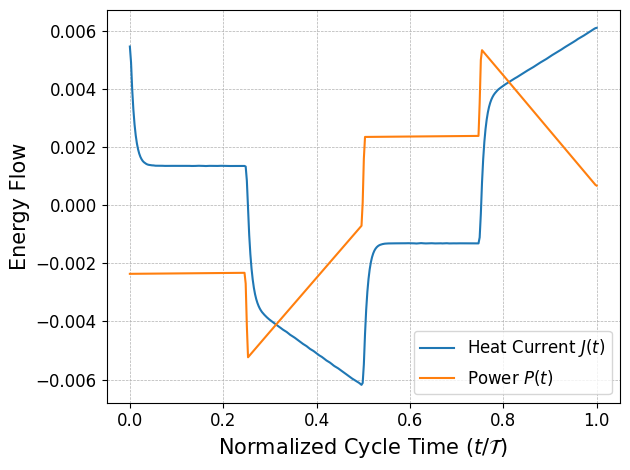

Delta_T=0.05 Omega=0.5_DONE

 E_ERROR_SUM=1.1094748783233022e-07

Delta_T=0.05 Omega=4.684210526315789_DONE

 E_ERROR_SUM=9.363926551583801e-07

Delta_T=0.05 Omega=8.868421052631579_DONE

 E_ERROR_SUM=1.375047104179572e-06

Delta_T=0.05 Omega=13.052631578947368_DONE

 E_ERROR_SUM=1.7472102561422176e-06

Delta_T=0.05 Omega=17.236842105263158_DONE

 E_ERROR_SUM=2.043640376592215e-06

Delta_T=0.05 Omega=21.421052631578945_DONE

 E_ERROR_SUM=2.2437980926603984e-06

Delta_T=0.05 Omega=25.605263157894736_DONE

 E_ERROR_SUM=2.383968135344361e-06

Delta_T=0.05 Omega=29.789473684210527_DONE

 E_ERROR_SUM=2.4711366142238234e-06

Delta_T=0.05 Omega=33.973684210526315_DONE

 E_ERROR_SUM=2.561476602380708e-06

Delta_T=0.05 Omega=38.1578947368421_DONE

 E_ERROR_SUM=2.608411282079004e-06

Delta_T=0.05 Omega=42.34210526315789_DONE

 E_ERROR_SUM=2.6504191659171283e-06

Delta_T=0.05 Omega=46.526315789473685_DONE

 E_ERROR_SUM=2.6874708627389055e-06

Delta_T=0.05 Omega=50.71052631578947_DONE

 E_ERROR_SU

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


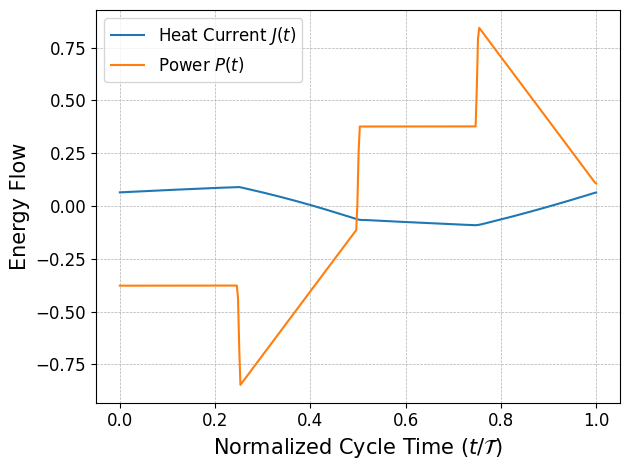

Delta_T=0.05 Omega=80.0_DONE

 E_ERROR_SUM=2.817749042982598e-06



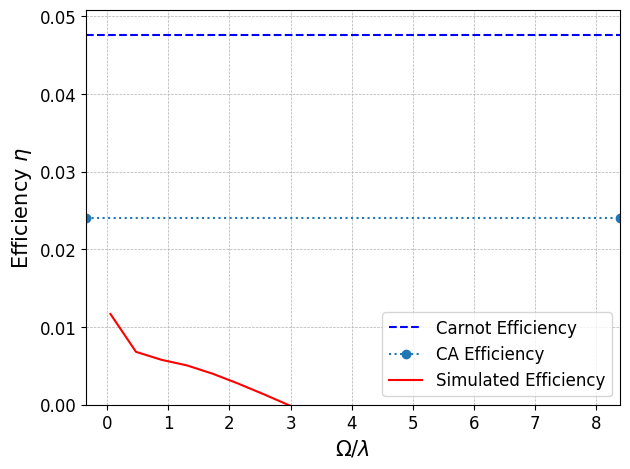

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


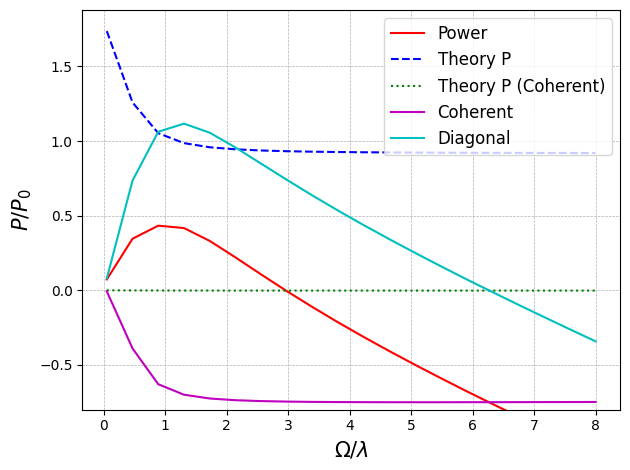

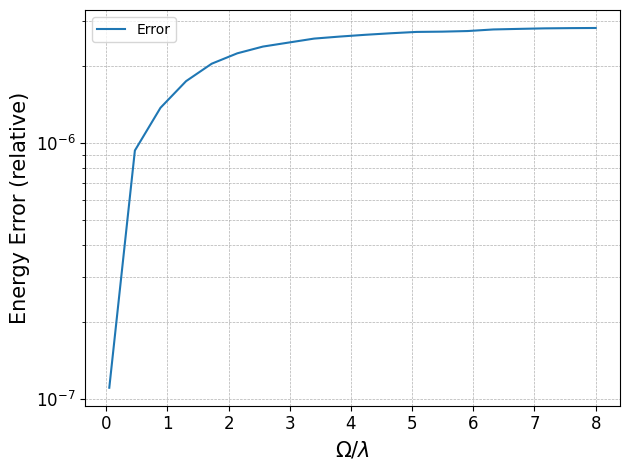

IndexError: list index out of range

In [ ]:
h_bar = 1
k_B = 1
N = 2

rho_iter = 100
iter_cutoff_num = 90

lamb = 10
omega = 2

kappa_0 = 1




gamma = lamb / (2 * np.cosh(kappa_0))

r = .5

T_0 = 1 # 低温時
Delta_T = .05 #温度幅
Delta_T_min = .005
Delta_T_max = 5
# Delta_T_list = np.linspace(Delta_T_min, Delta_T_max, 4)
# Delta_T_list = [.01, .05, .1, .5]

Delta_beta_max = 100
Delta_beta_min = 1

# Delta_beta_list = np.linspace(Delta_beta_min, Delta_beta_max, 20)
# Delta_T_list = sorted([1/Delta_beta for Delta_beta in Delta_beta_list])
Delta_T_list = [.05]

# Delta_T_list = [.001]

efficiency_DetlaT_list = []
Carnot_efficiency_DeltaT_list = []
CA_efficiency_DeltaT_list = []
efficiency_vs_Carnot_DeltaT_list = []
efficiency_vs_CA_DeltaT_list = []


# P_max_list = []

for Delta_T in Delta_T_list:
  P_max = []
  P_c_max = []
  g = kappa_0  / (np.cosh(kappa_0)**2)
  F_q = Delta_T**2/6.0

  P_0 = ((h_bar * omega * lamb) / 2.0) * ((Delta_T / T_0)**2) * 0.01
  P_theory=(omega*lamb/8.0)*g*F_q/(T_0**2)

  Carnot_efficiency = 1 - (T_0 / (T_0 + Delta_T))
  CA_efficiency = 1 - np.sqrt(T_0 / (T_0 + Delta_T))
  Carnot_efficiency_DeltaT_list.append(Carnot_efficiency)
  CA_efficiency_DeltaT_list.append(CA_efficiency)
  # efficiency_vs_CA_DeltaT_list.append(CA_efficiency)

  # Omega_num = 40
  # OmegaLambda_left = 0.05
  # OmegaLambda_right = 8.0
  Omega_num=20
  OmegaLambda_left = 0.05
  OmegaLambda_right = 8.0

  OmegaLambda_list = np.linspace(OmegaLambda_left, OmegaLambda_right, Omega_num)

  Omega_left = OmegaLambda_left * lamb
  Omega_right = OmegaLambda_right * lamb
  Omega_list = np.linspace(Omega_left, Omega_right, Omega_num)

  def f_q(t, cycle_time):
    t = t / cycle_time
    return (1*Delta_T) if t <= 0.25 else (2 - 4 * t)*Delta_T if t <= 0.5 else 0*Delta_T if t <= 0.75 else (-3 + 4 * t)*Delta_T

  def f_w(t, args):
    cycle_time = args["cycle_time"]
    t = t / cycle_time
    if t <= 0.25:
        return (-np.pi * 0.5 * t + (9 / 20))*Delta_T/T_0
    elif t <= 0.5:
        return (
            -(3 / 2) * np.pi * (t - 1 / 4)
            + np.pi * 0.5 * (4 * (t**2) - 0.25)
            - 0.5 * (4 * t - 1)
            - np.pi * 0.125
            + (9 / 20)
        )*Delta_T/T_0
    elif t <= 0.75:
        return (np.pi * 0.5 * (t - 0.5) - (1 / 20) - np.pi * 0.125)*Delta_T/T_0
    else:
        return (
            -np.pi * 0.5 * (4 * (t**2) - (9 / 4))
            + (7 / 2) * np.pi * (t - 0.75)
            + 0.5 * (4 * t - 3)
            - (1 / 20)
        )*Delta_T/T_0

  def dot_f_w(t, args):
    Tau = args["cycle_time"]
    t = t / Tau
    if t <= 0.25:
        return (-0.5*np.pi/Tau)*(Delta_T/T_0)
    elif t <= 0.5:
        return (
            (-1.5*np.pi/Tau+4.0*np.pi*(t/(Tau**2))-2.0/Tau)*(Delta_T/T_0)
        )*Delta_T/T_0
    elif t <= 0.75:
        return (0.5*np.pi/Tau)*(Delta_T/T_0)
    else:
        return (-4.0*np.pi*(t/(Tau**2))+3.5*np.pi/Tau+2.0/Tau)*(Delta_T/T_0)


  P = []
  P_c = []
  P_d = []
  P_fluc = []

  Heat_in_list = []
  Heat_out_list = []
  Heat_sum_list = []
  Work_out_list = []

  # Efficiency_l
  ist = []

  E_Error_sum_list = []

  # Carnot_efficiency_list = []
  # CA_efficiency_list = []
  efficiency_list = []
  # efficiency_vs_Carnot_list = []
  # efficiency_vs_CA_list = []

  for Omega in Omega_list:

    def T(t, cycle_time):
      return f_q(t, cycle_time) + T_0

    def beta(t, cycle_time):
      return 1/(T(t, cycle_time)*k_B)

    def kappa(t, args):
      cycle_time = args["cycle_time"]
      return np.sqrt((1+ r*f_w(t, args))**2+(1-r)**2*f_w(t, args)**2)/2*h_bar*omega*beta(t, cycle_time)

    def gamma_plus(t, args):
      cycle_time = args["cycle_time"]
      return gamma * np.exp(-kappa(t, args))

    def gamma_minus(t, args):
      cycle_time = args["cycle_time"]
      return gamma * np.exp(kappa(t, args))

        # 時間依存昇降演算子の生成
    def jump_operator_t_plus(t, args):

        # 時刻 t のハミルトニアン
        H_t = H[0] + H[1][0] * H[1][1](t, args)
        # 固有値と固有ベクトルを計算
        eigenvalues, eigenvectors = H_t.eigenstates()
        # 固有基底に基づく昇降演算子（例: 基底状態 -> 励起状態）
        ground_state = eigenvectors[0]  # 固有値が最小の状態
        excited_state = eigenvectors[1]  # 他の固有状態
        # 昇降演算子を構築
        tmp=Qobj(np.sqrt(gamma_plus(t,args)) * (excited_state * ground_state.dag()))
        return tmp

    # 時間依存昇降演算子の生成
    def jump_operator_t_minus(t, args):
        # 時刻 t のハミルトニアン
        H_t = H[0] + H[1][0] * H[1][1](t, args)
        # 固有値と固有ベクトルを計算
        eigenvalues, eigenvectors = H_t.eigenstates()
        # 固有基底に基づく昇降演算子（例: 基底状態 -> 励起状態）
        ground_state = eigenvectors[0]  # 固有値が最小の状態
        excited_state = eigenvectors[1]  # 他の固有状態
        # 昇降演算子を構築
        return Qobj(np.sqrt(gamma_minus(t,args)) * (ground_state * excited_state.dag()))

    # 時間依存エネルギー固有値、固有状態
    def E_t_states(t, args):
      H_t = H[0] + H[1][0] * H[1][1](t, args)
      return H_t.eigenstates()

    t_num = 400
    Tau = 2*np.pi/Omega
    t_list = np.linspace(0, Tau, t_num)
    Delta_t = Tau/t_num

    args = {"cycle_time":(2*np.pi/Omega)}
    args_list = [args for _ in t_list]

    psi_Omega = (((1-r)/r)**2) * (np.sinh(2*kappa_0) / (4 * kappa_0)) * ((Omega**2) / ((Omega**2) + (omega**2) + (lamb**2)/4.0))
    P_max.append(((h_bar * omega * lamb/ 8.0) * (g / (1 + psi_Omega)) * (F_q / (T_0**2))) / P_0)

    F_w = (1/args["cycle_time"]) * sum([((f_w(t, args)*(Delta_T/T_0))**2) * Delta_t for t in t_list])
    P_c_max.append((-(h_bar * omega * lamb/ 2.0) * (r**2) * g * psi_Omega * F_w) / P_0)

    H_sys = h_bar*omega * 0.5 * sigmaz()
    H_int = [h_bar*omega * 0.5 * (r*sigmaz() + (1-r)*sigmax()), f_w]
    H = [H_sys, H_int]
    L = [[jump_operator_t_plus], [jump_operator_t_minus]]



    rho_00=np.exp(-0.5*omega/(T_0+Delta_T))/(np.exp(-0.5*omega/(T_0+Delta_T))+np.exp(0.5*omega/(T_0+Delta_T)))
    rho_11=np.exp(0.5*omega/(T_0+Delta_T))/(np.exp(-0.5*omega/(T_0+Delta_T))+np.exp(0.5*omega/(T_0+Delta_T)))
    rho = ket2dm((basis(N, 0)*rho_00+basis(N, 1)*rho_11).unit())

    H_Qobj_list = [(H[0] + H[1][0] * h) for h in map(H[1][1], t_list, args_list)]
    H_list = [(H[0] + H[1][0] * h).full() for h in map(H[1][1], t_list, args_list)]
    H_dot_list = list(map(Qobj, np.gradient(H_list, Delta_t, axis=0)))
    H_dot_square_list = [H_dot_list[idx] * H_dot_list[idx] for idx in range(len(H_dot_list))] # NEW
    H_at_Omega = TimeDependentEigenSystem(H, t_list)

    process_window = int(t_num/4)
    first_endpoint = 0 + process_window
    second_endpoint = first_endpoint + process_window
    third_endpoint = second_endpoint + process_window
    fourth_endpoint = third_endpoint + process_window

    P_Omega = []
    P_d_Omega =[]

    P_fluc_Omega = []

    Heat_Omega = []

    Heat_in_iter_list = []
    Heat_out_iter_list = []
    Heat_sum_iter_list = []
    Work_out_iter_list = []
    Dot_Energy_iter_list = []

    for iter in range(rho_iter):
      result = mesolve(H, rho, t_list, c_ops = L, args = args)
      rho = result.states[-1]

      if iter >= iter_cutoff_num:
        rho_list = [state.full() for state in result.states]
        dot_rho_list = list(map(Qobj, np.gradient(rho_list, Delta_t, axis=0)))
        Heat_list = [(Qobj(H_list[idx]) * Qobj(dot_rho_list[idx])).tr() for idx in range(len(result.states))]

        Energy_list =[(Qobj(H_list[idx]) * Qobj(rho_list[idx])).tr() for idx in range(len(result.states))]
        dot_Energy_list = np.gradient(Energy_list, Delta_t, axis=0)
        dot_Energy_sum = sum(dot_Energy_list)

        dot_Energy_1st_process_sum = sum(dot_Energy_list[:first_endpoint])
        dot_Energy_2st_process_sum = sum(dot_Energy_list[first_endpoint:second_endpoint])
        dot_Energy_3nd_process_sum = sum(dot_Energy_list[second_endpoint:third_endpoint])
        dot_Energy_4rd_process_sum = sum(dot_Energy_list[third_endpoint:])

        # Heat_in = sum(Heat_list[:first_endpoint])+sum(Heat_list[third_endpoint:])
        Heat_in = sum(heat for heat in Heat_list if heat.real > 0)
        Heat_out = -sum(heat for heat in Heat_list if heat.real < 0)
        Heat_sum = Heat_in-Heat_out

        Heat_1st_process_sum = sum(Heat_list[:first_endpoint])
        Heat_2st_process_sum = sum(Heat_list[first_endpoint:second_endpoint])
        Heat_3nd_process_sum = sum(Heat_list[second_endpoint:third_endpoint])
        Heat_4rd_process_sum = sum(Heat_list[third_endpoint:])

        Heat_Omega+=Heat_list

        Work_list = [-(H_Qobj_list[idx] * result.states[idx]).tr() for idx in range(len(result.states))]
        #Work_list = [-(H_Qobj_list[idx] * result.states[idx]).tr() for idx in range(len(result.states))]

        Power_list = [-(H_dot_list[idx] * result.states[idx]).tr() for idx in range(len(result.states))]
        P_Omega+=Power_list
        Work_out = sum(Power_list)

        Power_1st_process_sum = sum(Power_list[:first_endpoint])
        Power_2st_process_sum = sum(Power_list[first_endpoint:second_endpoint])
        Power_3nd_process_sum = sum(Power_list[second_endpoint:third_endpoint])
        Power_4rd_process_sum = sum(Power_list[third_endpoint:])

        Power_fluctuation_list = [(H_dot_square_list[idx] * result.states[idx]).tr() - (Power_list[idx] * Power_list[idx]) for idx in range(len(result.states))]
        P_fluc_Omega += Power_fluctuation_list

        dot_E_t_gs_list = H_at_Omega.get_eigenvalue_derivatives(0)
        dot_E_t_es_list = H_at_Omega.get_eigenvalue_derivatives(1)
        P_d_list = [-(dot_E_t_gs_list[idx] * (H_at_Omega.get_eigenvector(idx, 0).dag() * result.states[idx] * H_at_Omega.get_eigenvector(idx, 0)) + dot_E_t_es_list[idx] * ((H_at_Omega.get_eigenvector(idx, 1).dag() * result.states[idx] * H_at_Omega.get_eigenvector(idx, 1)))) for idx, t in enumerate(t_list)]
        P_d_Omega+=P_d_list

        Heat_in_iter_list.append(Heat_in)
        Heat_out_iter_list.append(Heat_out)
        Heat_sum_iter_list.append(Heat_sum)
        Work_out_iter_list.append(Work_out)
        Dot_Energy_iter_list.append(dot_Energy_sum)

    # Heat_at_Omega = sum(Heat_Omega)*Delta_t / ((rho_iter-iter_cutoff_num) * P_0)
    # Heat_Omega.append(Heat_at_Omega
        # if iter == rho_iter-1:
    # print(f"Omega={Omega}_DONE, ") # デバッグ
    #       # print(f"HEAT_IN={Heat_in}\n")
    #       # print(f"HEAT_OUT={Heat_out}\n")
    # print(f"HEAT_SUM={Heat_sum}\n")
    # print(f"WORK_OUT={Work_out}\n")
        if iter == rho_iter-1 and (Omega == Omega_list[0] or Omega == Omega_list[-1]):
          print(f"Omega={Omega}\n")
          time_cycle = [aa/args["cycle_time"] for aa in t_list]
          plt.plot(time_cycle, Heat_list, label="Heat Current $J(t)$")
          plt.plot(time_cycle, Power_list, label="Power $P(t)$")
          plt.xlabel("Normalized Cycle Time ($t/\\mathcal{T}$)", {"fontsize":15})
          plt.ylabel("Energy Flow", {"fontsize":15})
          plt.tick_params(axis='both', which='major', labelsize=12)
          plt.legend(fontsize=12)
          plt.grid(linestyle="--", linewidth=0.5)
          plt.tight_layout()
          plt.savefig(f"heat_power_cycle_Omega{Omega}.pdf", format="pdf", dpi=300)
          plt.show()

    Heat_in_avg = sum(Heat_in_iter_list) / (rho_iter-iter_cutoff_num)
    Heat_out_avg = sum(Heat_out_iter_list) / (rho_iter-iter_cutoff_num)
    Heat_sum_avg = sum(Heat_sum_iter_list) / (rho_iter-iter_cutoff_num)
    Work_out_avg = sum(Work_out_iter_list) / (rho_iter-iter_cutoff_num)
    Dot_Energy_avg = sum(Dot_Energy_iter_list) / (rho_iter-iter_cutoff_num)

    Heat_1st_process_avg = Heat_1st_process_sum / (rho_iter-iter_cutoff_num)
    Heat_2st_process_avg = Heat_2st_process_sum / (rho_iter-iter_cutoff_num)
    Heat_3nd_process_avg = Heat_3nd_process_sum / (rho_iter-iter_cutoff_num)
    Heat_4rd_process_avg = Heat_4rd_process_sum / (rho_iter-iter_cutoff_num)

    Power_1st_process_avg = Power_1st_process_sum / (rho_iter-iter_cutoff_num)
    Power_2st_process_avg = Power_2st_process_sum / (rho_iter-iter_cutoff_num)
    Power_3nd_process_avg = Power_3nd_process_sum / (rho_iter-iter_cutoff_num)
    Power_4rd_process_avg = Power_4rd_process_sum / (rho_iter-iter_cutoff_num)

    dot_Energy_1st_process_sum = dot_Energy_1st_process_sum / (rho_iter-iter_cutoff_num)
    dot_Energy_2st_process_sum = dot_Energy_2st_process_sum / (rho_iter-iter_cutoff_num)
    dot_Energy_3nd_process_sum = dot_Energy_3nd_process_sum / (rho_iter-iter_cutoff_num)
    dot_Energy_4rd_process_sum = dot_Energy_4rd_process_sum / (rho_iter-iter_cutoff_num)

    Heat_in_sum = Heat_1st_process_avg + Heat_4rd_process_avg
    Heat_out_sum = -(Heat_2st_process_avg + Heat_3nd_process_avg)
    Heat_diff = Heat_in_sum - Heat_out_sum
    Work_out_sum = Power_1st_process_avg + Power_2st_process_avg + Power_3nd_process_avg + Power_4rd_process_avg


    print(f"Delta_T={Delta_T} Omega={Omega}_DONE") # デバッグ
    # print(f"HEAT_IN={Heat_in}\n")
    # print(f"HEAT_OUT={Heat_out}\n")
    # print(f"")
    # print(f"HEAT_SUM_avg={Heat_sum_avg}\n")
    # print(f"WORK_OUT_avg={Work_out_avg}\n")
    # print(f"dot_ENERGY_avg={Dot_Energy_avg}\n")

    E_1st_diff=Heat_1st_process_avg-Power_1st_process_avg
    E_1st_Error = abs(E_1st_diff - dot_Energy_1st_process_sum)
    # print(f"HEAT_1st_SUM_avg={Heat_1st_process_avg}\n")
    # print(f"Power_1st_SUM_avg={Power_1st_process_avg}\n")
    # print(f"E_1st_diff = {E_1st_diff}\n")
    # print(f"dot_ENERGY_1st_SUM_avg={dot_Energy_1st_process_sum}\n")

    E_2st_diff=Heat_2st_process_avg-Power_2st_process_avg
    E_2st_Error = abs(E_2st_diff - dot_Energy_2st_process_sum)
    # print(f"HEAT_2st_SUM_avg={Heat_2st_process_avg}\n")
    # print(f"Power_2st_SUM_avg={Power_2st_process_avg}\n")
    # print(f"E_2st_diff = {E_2st_diff}\n")
    # print(f"dot_ENERGY_2st_SUM_avg={dot_Energy_2st_process_sum}\n")

    E_3rd_diff=Heat_3nd_process_avg-Power_3nd_process_avg
    E_3rd_Error = abs(E_3rd_diff - dot_Energy_3nd_process_sum)
    # print(f"HEAT_3rd_SUM_avg={Heat_3nd_process_avg}\n")
    # print(f"Power_3rd_SUM_avg={Power_3nd_process_avg}\n")
    # print(f"E_3st_diff = {E_3rd_diff}\n")
    # print(f"dot_ENERGY_3rd_SUM_avg={dot_Energy_3nd_process_sum}\n")

    E_4rd_diff=Heat_4rd_process_avg-Power_4rd_process_avg
    E_4rd_Error = abs(E_4rd_diff - dot_Energy_4rd_process_sum)
    # print(f"HEAT_4rd_SUM_avg={Heat_4rd_process_avg}\n")
    # print(f"Power_3rd_SUM_avg={Power_4rd_process_avg}\n")
    # print(f"E_4st_diff = {E_4rd_diff}\n")
    # print(f"dot_ENERGY_4rd_SUM_avg={dot_Energy_4rd_process_sum}\n")

    E_Error_sum = E_1st_Error + E_2st_Error + E_3rd_Error + E_4rd_Error
    print(f"\n E_ERROR_SUM={E_Error_sum}\n")
    # print(f"HEAT_out_SUM={Heat_out_sum}\n")
    # print(f"HEAT_diff={Heat_diff}\n")
    # print(f"WORK_out_SUM={Work_out_sum}\n")
    E_Error_sum_list.append(E_Error_sum)


    Heat_in_list.append(Heat_in_avg)
    Heat_out_list.append(Heat_out_avg)
    Heat_sum_list.append(Heat_sum_avg)
    Work_out_list.append(Work_out_avg)

    Efficiency_Omega = Work_out_sum/Heat_in_sum
    # efficiency_vs_carnot = Efficiency_Omega/Carnot_efficiency
    # efficiency_vs_CA = Efficiency_Omega/CA_efficiency



    # efficiency_vs_Carnot_list.append(efficiency_vs_carnot)
    # efficiency_vs_CA_list.append(efficiency_vs_CA)
    efficiency_list.append(Efficiency_Omega.real)

    P_d_at_Omega = sum(P_d_Omega) * Delta_t / ((rho_iter-iter_cutoff_num)*args["cycle_time"] * P_0)
    P_at_Omega = sum(P_Omega) * Delta_t / ((rho_iter-iter_cutoff_num) * args["cycle_time"] * P_0)
    P_d.append(P_d_at_Omega)

    P_c.append(P_at_Omega - P_d_at_Omega)
    P.append(P_at_Omega)

    # P_fluc_at_Omega = sum(P_fluc_Omega)* Delta_t / ((rho_iter-iter_cutoff_num) * (args["cycle_time"]**2) * P_0)
    P_fluc_at_Omega = sum(P_fluc_Omega)* Delta_t / ((rho_iter-iter_cutoff_num) * args["cycle_time"] * P_0)
    P_fluc.append(P_fluc_at_Omega)

  # plt.plot(OmegaLambda_list, P, label=f"$\Delta T={Delta_T}$")

  P_theory_list = [P_theory/P_0 for _ in OmegaLambda_list]
  # plt.plot(OmegaLambda_list,P_max,color='b',linestyle="dashed",label='theory')
  # plt.plot(OmegaLambda_list, P, label=f"$P$")
  # plt.plot(OmegaLambda_list, P_c, label=f"$P_c$")
  # plt.legend()
  # plt.ylim(bottom=-6)
  # plt.xlabel("$\Omega/\lambda$",{"fontsize":15})
  # plt.ylabel("$P/P_0$",{"fontsize":15})
  # plt.tick_params(axis='both', which='major', labelsize=12)
  # plt.grid()
  # plt.tight_layout()
  # plt.savefig("classical_Pmax.pdf", format="pdf", dpi=300)
  # plt.show()
  # Efficiencyの出力
  # Carnot_efficiency_list = [Carnot_efficiency for _ in OmegaLambda_list]
  # CA_efficeincy_list = [CA_efficiency for _ in OmegaLambda_list]

  plt.axhline(y=Carnot_efficiency, color="blue", linestyle="--", label="Carnot Efficiency")
  plt.axhline(y=CA_efficiency, linestyle=":", marker="o", label="CA Efficiency")
  plt.plot(OmegaLambda_list, efficiency_list, linestyle="-", color="red", label="Simulated Efficiency")  # 実線
  plt.ylim(bottom=0)
  plt.xlabel("$\Omega/\lambda$",{"fontsize":15})
  plt.ylabel("Efficiency $\eta$", {"fontsize":15})
  plt.legend(fontsize=12)  # 凡例の文字サイズを調整
  plt.tick_params(axis='both', which='major', labelsize=12)
  plt.grid(linestyle='--', linewidth=0.5)  # グリッドを点線で調整
  plt.tight_layout()
  plt.savefig(f"Cls_Efficiency_cls_Delta_T{Delta_T}_tnum{t_num}.pdf", format="pdf", dpi=300)
  plt.show()

  #どのΩ/λにおける熱効率を採用するか。あと、=3,4までの領域までやればいいだろ
  eff_max = max(efficiency_list)
  efficiency_DetlaT_list.append(eff_max)
  # Carnot_efficiency_DeltaT_list.append(Carnot_efficiency)
  # CA_efficiency_DeltaT_list.append(CA_efficiency)
  efficiency_vs_CA = eff_max / CA_efficiency
  efficiency_vs_Carnot = eff_max / Carnot_efficiency

  efficiency_vs_Carnot_DeltaT_list.append(efficiency_vs_Carnot)
  efficiency_vs_CA_DeltaT_list.append(efficiency_vs_CA)
  # efficiency_vs_CA_list.append()
  # efficiency_vs_Carnot_list.append()

# P_dの出力
# plt.plot(OmegaLambda_list, P_d, label="Power_d")
# plt.legend()
# # plt.title("diagonal power",{"fontsize":20})
# plt.xlabel("$\Omega/\lambda$",{"fontsize":15})
# plt.ylabel("$P_d/P_0$",{"fontsize":15})
# plt.grid()
# plt.tight_layout()
# plt.savefig("nlin_diagonal_Power.pdf", format="pdf", dpi=300)
# plt.show()

# # P_cの出力
# plt.plot(OmegaLambda_list, P_c, label="Power_c")
# plt.legend()
# # plt.title("offdiagonal power",{"fontsize":20})
# plt.xlabel("$\Omega/\lambda$",{"fontsize":15})
# plt.ylabel("$P_c/P_0$",{"fontsize":15})
# plt.grid()
# plt.tight_layout()
# plt.savefig("nlin_Coherent_Power_vs_linear_therory.pdf", format="pdf", dpi=300)
# plt.show()

# Pの出力
# P_theory_list = [P_theory/P_0 for _ in OmegaLambda_list]
plt.plot(OmegaLambda_list, P, color='r', linestyle="-", label="Power")
plt.plot(OmegaLambda_list, P_max, color='b', linestyle="dashed", label="Theory P")
plt.plot(OmegaLambda_list, P_c_max, color='g', linestyle="dotted", label="Theory P (Coherent)")
plt.plot(OmegaLambda_list, P_c, color='m', linestyle="-", label="Coherent")
plt.plot(OmegaLambda_list, P_d, color='c', linestyle="-", label="Diagonal")
plt.ylim(bottom=-0.8)
plt.legend(fontsize=12, loc="best")
# plt.title("total power",{"fontsize":20})

plt.xlabel("$\Omega/\lambda$",{"fontsize":15})
plt.ylabel("$P/P_0$",{"fontsize":15})
plt.grid(linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(f"Coh_Power_vs_linear_theory_tnum{t_num}.pdf", format="pdf", dpi=300)
# plt.savefig(f"Power_vs_linear_therory.pdf_tnum{t_num}", format="pdf", dpi=300)
plt.show()

# P_flucの出力
# P_theory_list = [P_theory/P_0 for _ in OmegaLambda_list]
# plt.plot(OmegaLambda_list, P_fluc, label="Power_fluc")
# # plt.plot(OmegaLambda_list,P_fluc, label="Power_fluc
# # plt.plot(OmegaLambda_list,P_theory_list,color='b',linestyle="dashed",label='theory')
# plt.legend()
# # plt.title("fluctuation of power",{"fontsize":20})
# plt.xlabel("$\Omega/\lambda$",{"fontsize":15})
# plt.ylabel("$P_f/P_0$",{"fontsize":15})
# plt.grid()
# plt.show()

# Heat, Work_outの出力
# plt.plot(OmegaLambda_list, Heat_in_list, label="Heat_in")
# plt.plot(OmegaLambda_list, Heat_out_list, label="Heat_out")
# plt.plot(OmegaLambda_list, Heat_sum_list, label="Heat_sum")
# plt.plot(OmegaLambda_list, Work_out_list, label="Work_out")
# plt.plot(OmegaLambda_list, E_Error_sum, label="Error")
# plt.plot(OmegaLambda_list, Work_out_list, label="Work_out")
# plt.yscale("log")
# plt.legend()
# # plt.title("diagonal power",{"fontsize":20})
# plt.xlabel("$\Omega/\lambda$",{"fontsize":15})
# plt.tick_params(axis='both', which='major', labelsize=12)
# # plt.ylabel("$P_d/P_0$",{"fontsize":15})
# plt.grid(which='both', linestyle='--', linewidth=0.5)  # 対数目盛のグリッドを調整
# plt.tight_layout()
# plt.savefig("E_ERROR.pdf", format="pdf", dpi=300)
# plt.show()

# 第一法則からのズレ
plt.plot(OmegaLambda_list, E_Error_sum_list, label="Error")
# plt.plot(OmegaLambda_list, Work_out_list, label="Work_out")
plt.yscale("log")
plt.legend()
# plt.title("diagonal power",{"fontsize":20})
plt.xlabel("$\Omega/\lambda$",{"fontsize":15})
plt.ylabel("Energy Error (relative)", {"fontsize":15})  # 相対誤差を意味
plt.tick_params(axis='both', which='major', labelsize=12)
# plt.ylabel("$P_d/P_0$",{"fontsize":15})
plt.grid(which='both', linestyle='--', linewidth=0.5)  # 対数目盛のグリッドを調整
plt.tight_layout()
plt.savefig("Cls_E_ERROR.pdf", format="pdf", dpi=300)
plt.show()



# diff = [abs(Hs-Wo) for Hs, Wo in zip(Heat_sum_list, Work_out_list)]
# plt.plot(OmegaLambda_list, diff, label="Diff")
# # plt.legend()
# # plt.title("diagonal power",{"fontsize":20})
# plt.xlabel("$\Omega/\lambda$",{"fontsize":15})
# # plt.ylabel("$P_d/P_0$",{"fontsize":15})
# plt.grid()
# plt.tight_layout()
# plt.savefig("nlin_coh_Diff_from_1st.pdf", format="pdf", dpi=300)
# plt.show()

# # Efficiencyの出力
# Carnot_efficiency_list = [Carnot_efficiency for _ in OmegaLambda_list]
# CA_efficeincy_list = [CA_efficiency for _ in OmegaLambda_list]
# plt.plot(OmegaLambda_list, Carnot_efficiency_list, label="Carnot_efficiency")
# plt.plot(OmegaLambda_list, Efficiency_list, label="efficiency")
# plt.legend()
# plt.xlabel("$\Omega/\lambda$",{"fontsize":15})
# # plt.ylabel("$P_d/P_0$",{"fontsize":15})
# plt.grid()
# plt.tight_layout()
# plt.savefig("Efficiency_cls.pdf", format="pdf", dpi=300)
# plt.show()

# Efficiency_vs_Carnort_effの出力
# Efficiency_max = max(Efficiency_list)
# Efficiency_min = min(Efficiency_list)
# vs_Carnot_efficiency_list = [Efficiency/Carnot_efficiency for Efficiency, Carnot_efficiency in zip(Efficiency_list, Carnot_efficiency_list)]
# plt.plot(OmegaLambda_list, vs_Carnot_efficiency_list, label="ratio")
# # plt.plot(OmegaLambda_list, Carnot_efficiency_list, label="Carnot_efficiency")
# plt.legend()
# plt.xlabel("$\Omega/\lambda$",{"fontsize":15})
# # plt.ylabel("$P_d/P_0$",{"fontsize":15})
# plt.grid()
# plt.tight_layout()
# plt.savefig("Efficiency_vs_Carnot_eff_cls.pdf", format="pdf", dpi=300)
# plt.show()

# plt.axhline(y=Carnot_efficiency, color="blue", linestyle="--", label="Carnot Efficiency")
# plt.axhline(y=CA_efficiency, linestyle=":", marker="o", label="CA Efficiency")

Delta_T_min = Delta_T_list[1]#min(Delta_T_list)
# プロット
plt.plot(Delta_T_list[:-2], Carnot_efficiency_DeltaT_list[:-2], linestyle="--", color="blue", label="Carnot Efficiency")  # 破線で区別
plt.plot(Delta_T_list[:-2], CA_efficiency_DeltaT_list[:-2], linestyle="-.", color="green", label="CA Efficiency")  # 点線と実線の組み合わせ
plt.plot(Delta_T_list[:-2], efficiency_DetlaT_list[:-2], linestyle="-", color="red", label="Simulated Efficiency")  # 実線で明確に
# 軸範囲
plt.ylim(bottom=0)
# 軸ラベル
plt.xlabel(r"$\Delta T$", {"fontsize":15})
plt.ylabel("Efficiency $\eta$", {"fontsize":15})
# 凡例
plt.legend(fontsize=12, loc="best")  # 自動配置で重なりを回避
# グリッド
plt.grid(linestyle='--', linewidth=0.5)
# レイアウト調整
plt.tight_layout()
# 保存
plt.savefig(f"Cls_Efficiency_DeltaTmin{Delta_T_min}_tnum{t_num}.pdf", format="pdf", dpi=300)
# プロット表示
plt.show()

# 対理論効率
plt.plot(Delta_T_list[:-2], efficiency_vs_Carnot_DeltaT_list[:-2], color="blue", label="vs Carnot Efficiency")  # 破線で区別
plt.plot(Delta_T_list[:-2], efficiency_vs_CA_DeltaT_list[:-2], color="green", label="vs CA Efficiency")  # 点線と実線の組み合わせ
# plt.plot(Delta_beta_list, efficiency_DetlaT_list, linestyle="-", color="red", label="Simulated Efficiency")  # 実線で明確に
# 軸範囲
plt.ylim(bottom=0)
# 軸ラベル
plt.xlabel(r"$\Delta T$", {"fontsize":15})
plt.ylabel("Efficiency Ratio", {"fontsize":15})
# 凡例
plt.legend(fontsize=12, loc="best")  # 自動配置で重なりを回避
# グリッド
plt.grid(linestyle='--', linewidth=0.5)
# レイアウト調整
plt.tight_layout()
# 保存
plt.savefig(f"Cls_Efficiency Ratio_DeltaTmin{Delta_T_min}_tnum{t_num}.pdf", format="pdf", dpi=300)
# プロット表示
plt.show()

In [ ]:
F_w

0.002645251772211278

In [ ]:
F_q

0.00041666666666666675

In [ ]:
P_c_max

[-1.6904590294001582e-05,
 -0.0008519003473136501,
 -0.0014450189942850362,
 -0.0016901461771601286,
 -0.0018019531633048803,
 -0.0018602682967129678,
 -0.0018940585027798062,
 -0.0019152481541671411,
 -0.0019293611253989368,
 -0.0019392132853087239,
 -0.0019463541471584933,
 -0.0019516906790369632,
 -0.0019557813031524625,
 -0.0019589846225487526,
 -0.0019615392449584246,
 -0.001963608822530724,
 -0.0019653085744836944,
 -0.0019667214924726398,
 -0.0019679085655304944,
 -0.0019689154164175414]